# Libraries

In [1]:
import os

# For managing warning messages.
import warnings

# Data cleaning
import pandas as pd
import numpy as np
import ast           # To convert string to dictionary
import datetime


# Statistical analysis and hypothesis testing.
from scipy import stats

# Visualization / EDA
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

# Saving trained models for future deployment.
import pickle

# For dimensionality reduction and feature extraction.
from sklearn.decomposition import PCA

# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning : Training
from xgboost import plot_importance
# Regression
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score # Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
ConfusionMatrixDisplay, classification_report # Classification

# Dataset Information

In [2]:
df=pd.read_csv('C:\\Users\\Saravanan\\OneDrive\\Desktop\\Retail_sales(Final Project)\\retail_sale_dataset.csv')

In [3]:
df

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,1,05/02/2010,24924.50,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,A,151315,1,12/02/2010,46039.49,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,A,151315,1,19/02/2010,41595.55,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,A,151315,1,26/02/2010,19403.54,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,A,151315,1,05/03/2010,21827.90,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,98,28/09/2012,508.37,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,B,118221,98,05/10/2012,628.10,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,B,118221,98,12/10/2012,1061.02,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,B,118221,98,19/10/2012,760.01,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Dept          421570 non-null  int64  
 4   Date          421570 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [5]:
df.shape

(421570, 16)

## Duplicate

In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Length: 421570, dtype: bool

## Null Values

In [7]:
df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [8]:
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')

uniqueyears=df['Date'].dt.year.unique()
uniqueyears

array([2010, 2011, 2012], dtype=int32)

In [9]:
df.Dept.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [10]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')

In [11]:
category_column = ['store','type','dept','isholiday']
continuous_columns = ['temperature','fues_price','markdown1', 'markdown2','markdown3','markdown4','markdown5','cpi',
                      'weekly_sales','size']

In [12]:
string_columns = df.select_dtypes(exclude = ['int64','float64','datetime64[ns]']).columns
numeric_columns = df.select_dtypes(include = ['int64','float64']).columns

In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Size,421570.0,136727.915739,34875.0,93638.0,140167.0,202505.0,219622.0,60980.583328
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,421570.0,2590.074819,0.0,0.0,0.0,2809.05,88646.76,6052.385934
MarkDown2,421570.0,879.974298,-265.76,0.0,0.0,2.2,104519.54,5084.538801
MarkDown3,421570.0,468.087665,-29.1,0.0,0.0,4.54,141630.61,5528.873453


In [14]:
corl= df[numeric_columns].corr()
corl

,Store,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,-0.182881,0.024004,-0.085195,-0.050097,0.065290,-0.059844,-0.033829,-0.020331,-0.042724,-0.012452,-0.211088,0.208552
Size,-0.182881,1.000000,-0.002966,0.243828,-0.058313,0.003361,0.169788,0.078372,0.033641,0.127334,0.153011,-0.003314,-0.068238
Dept,0.024004,-0.002966,1.000000,0.148032,0.004437,0.003572,0.001494,0.000587,0.001475,0.001937,0.002668,-0.007477,0.007837
Weekly_Sales,-0.085195,0.243828,0.148032,1.000000,-0.002312,-0.000120,0.047172,0.020716,0.038562,0.037467,0.050465,-0.020921,-0.025864
Temperature,-0.050097,-0.058313,0.004437,-0.002312,1.000000,0.143859,-0.026415,-0.179672,-0.056026,-0.050281,-0.014752,0.182112,0.096730
Fuel_Price,0.065290,0.003361,0.003572,-0.000120,0.143859,1.000000,0.297056,0.029153,0.018615,0.166622,0.215420,-0.164210,-0.033853
MarkDown1,-0.059844,0.169788,0.001494,0.047172,-0.026415,0.297056,1.000000,0.174868,-0.014411,0.838904,0.415050,0.010915,-0.105168
MarkDown2,-0.033829,0.078372,0.000587,0.020716,-0.179672,0.029153,0.174868,1.000000,-0.006080,0.113250,0.131735,-0.003554,-0.041427
MarkDown3,-0.020331,0.033641,0.001475,0.038562,-0.056026,0.018615,-0.014411,-0.006080,1.000000,-0.012020,0.042471,-0.005839,-0.018078
MarkDown4,-0.042724,0.127334,0.001937,0.037467,-0.050281,0.166622,0.838904,0.113250,-0.012020,1.000000,0.303370,-0.002047,-0.076513


In [15]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
correlation_matrix=corl
fig=px.imshow(correlation_matrix,color_continuous_scale='Magma',title='correlation_matrix')
fig.show()

In [ ]:
import plotly.express as px

correlation_matrix = corl  # assuming `corl` is your correlation matrix
fig = px.imshow(correlation_matrix, color_continuous_scale='Magma', title='correlation_matrix')
fig.show()


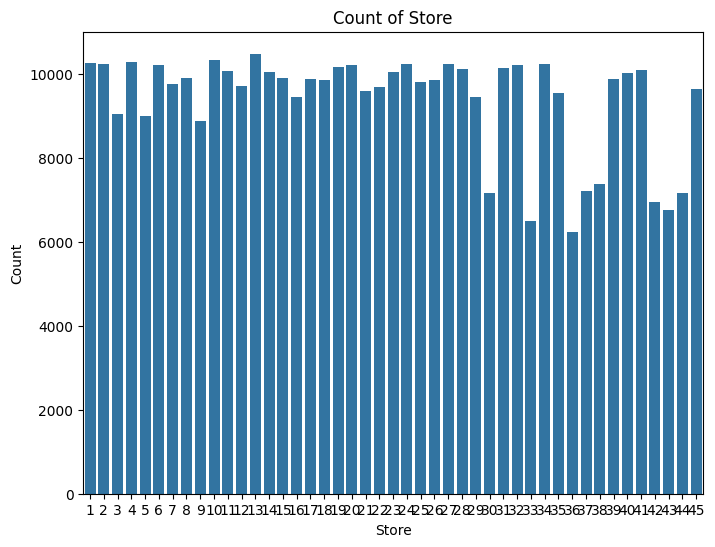

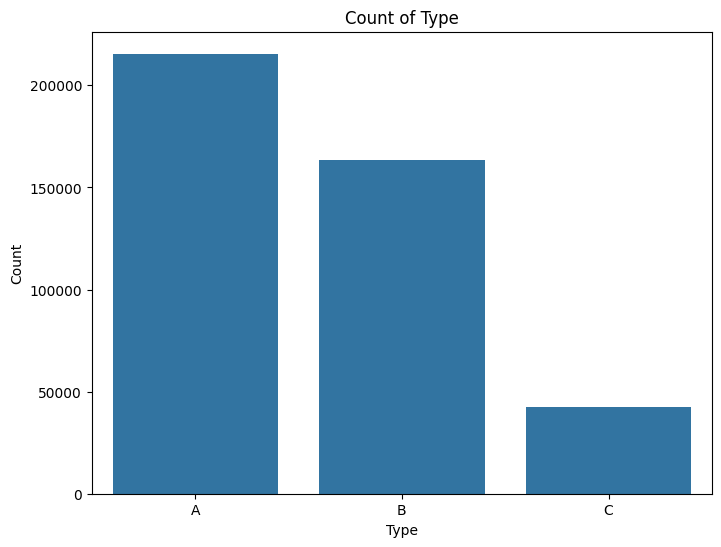

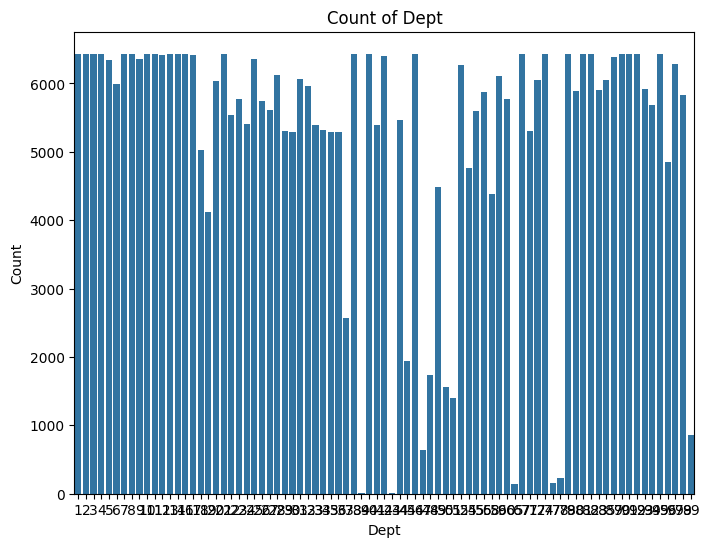

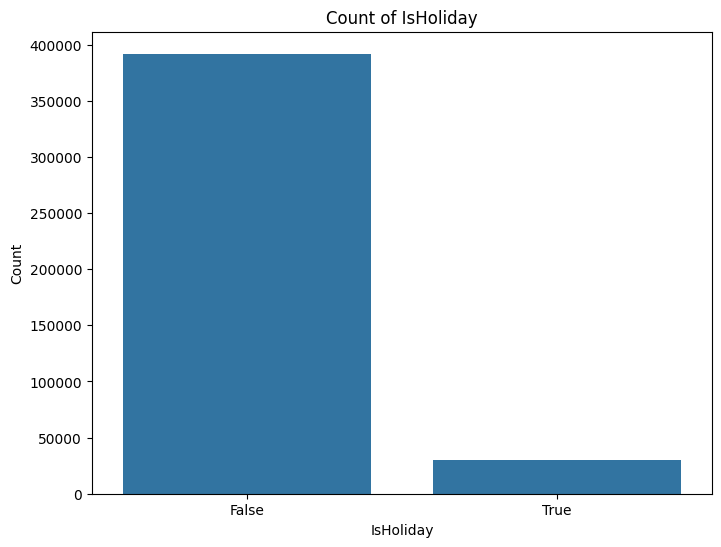

In [28]:
category_column = ['Store', 'Type', 'Dept', 'IsHoliday']


for column in category_column:
    if column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Column '{column}' does not exist in the DataFrame.")

In [ ]:
df.Type.unique()

array(['A', 'B', 'C'], dtype=object)

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')


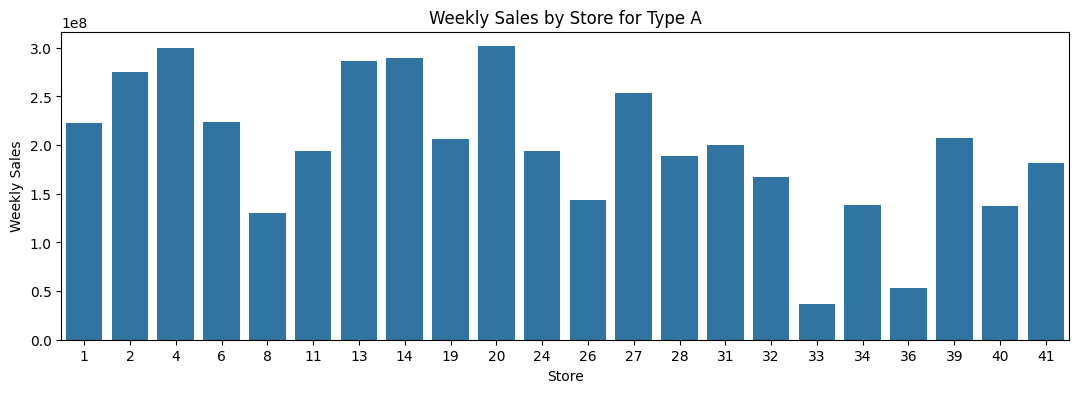

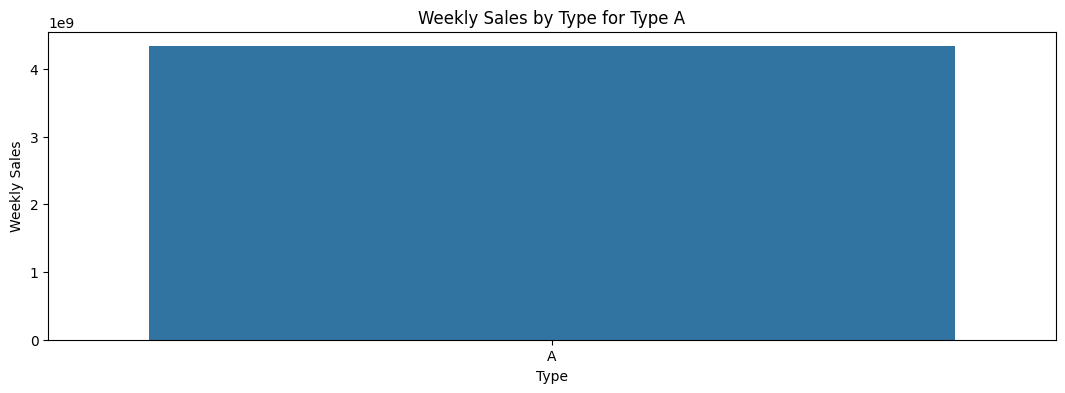

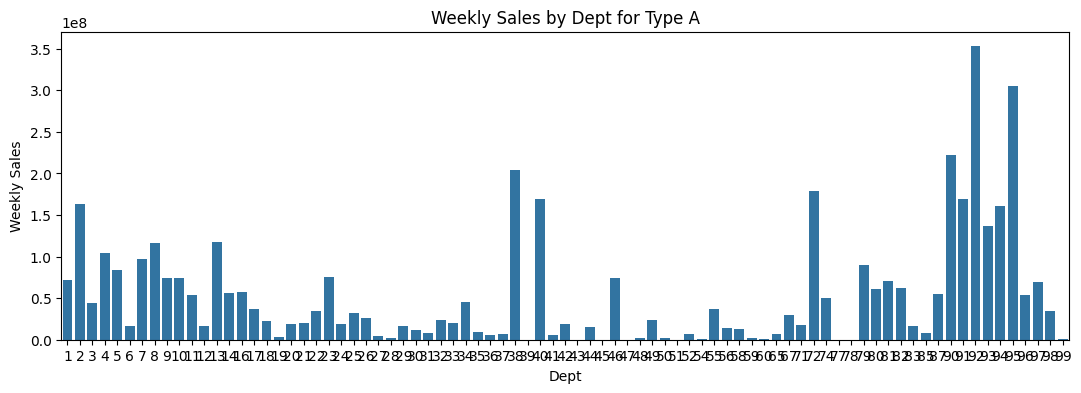

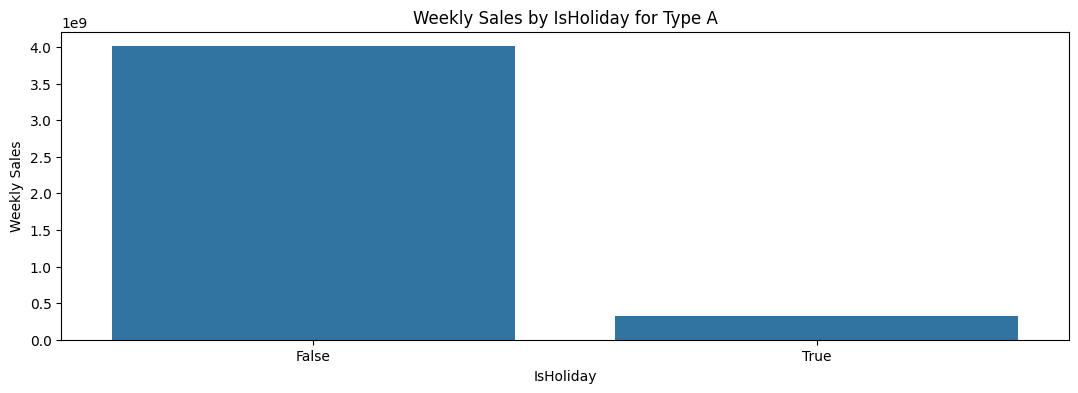

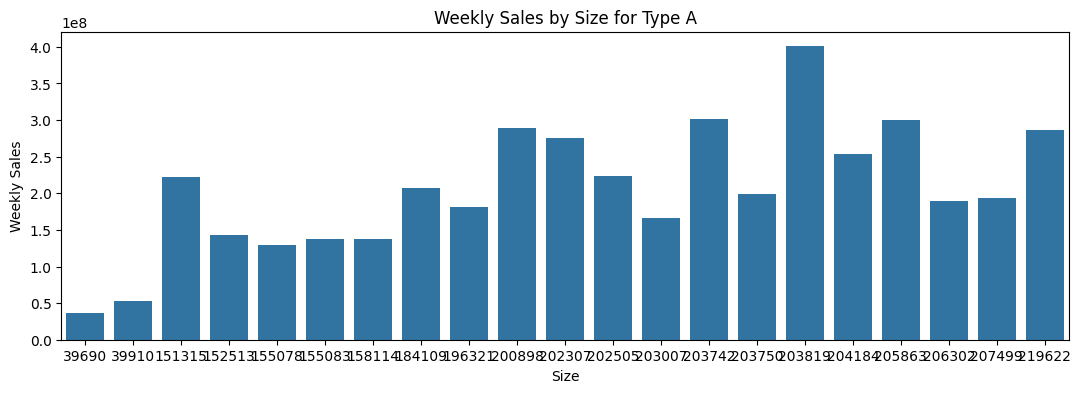

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the columns to verify
dftype_A=df[df['Type']=='A']
print(dftype_A.columns)

category_columns = ['Store', 'Type', 'Dept', 'IsHoliday','Size']  # Ensure the column names match the DataFrame
sales_column = 'Weekly_Sales'  # Ensure the column name matches the DataFrame

for category_column in category_columns:
    if category_column in dftype_A.columns and sales_column in dftype_A.columns:
        plt.figure(figsize=(13, 4))

        # Aggregate the weekly sales by the specified column
        agg_df = dftype_A.groupby(category_column)[sales_column].sum().reset_index()

        # Plot the aggregated data
        sns.barplot(x=category_column, y=sales_column, data=agg_df)
        plt.title(f'Weekly Sales by {category_column} for Type A')
        plt.xlabel(category_column)
        plt.ylabel('Weekly Sales')
        plt.show()
    else:
        print(f"One or both columns '{category_column}' and '{sales_column}' are not found in the DataFrame.")


Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')


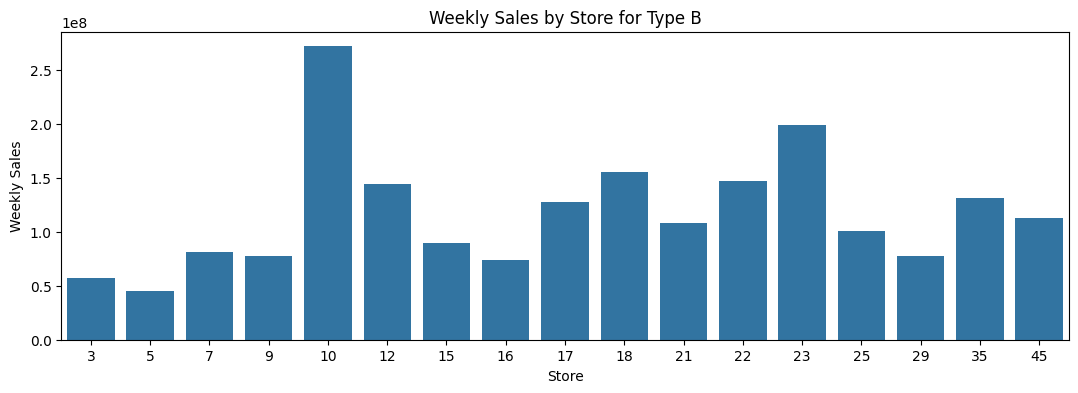

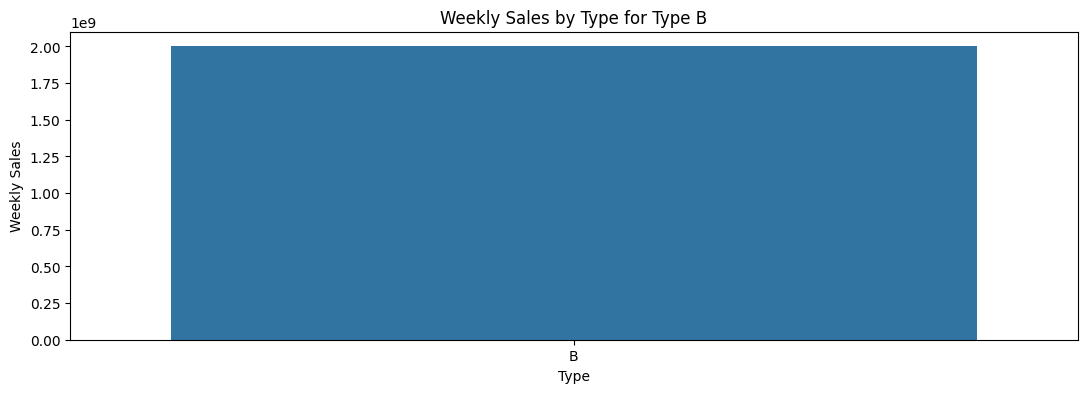

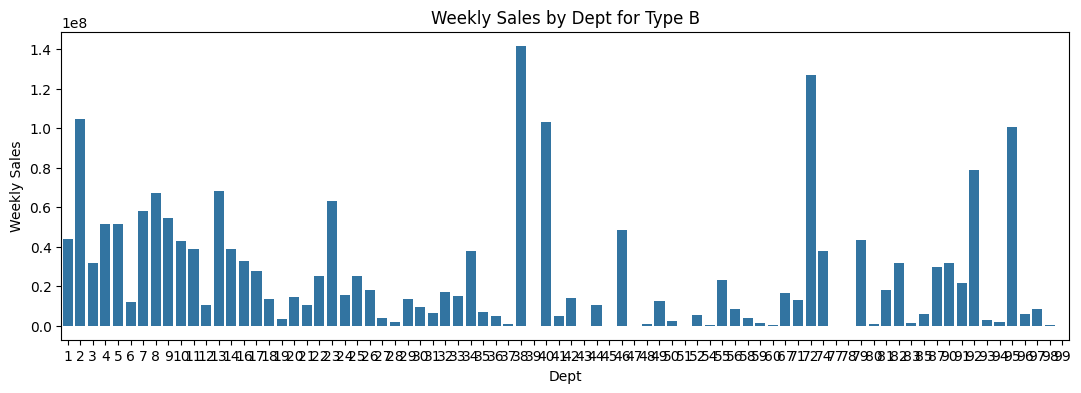

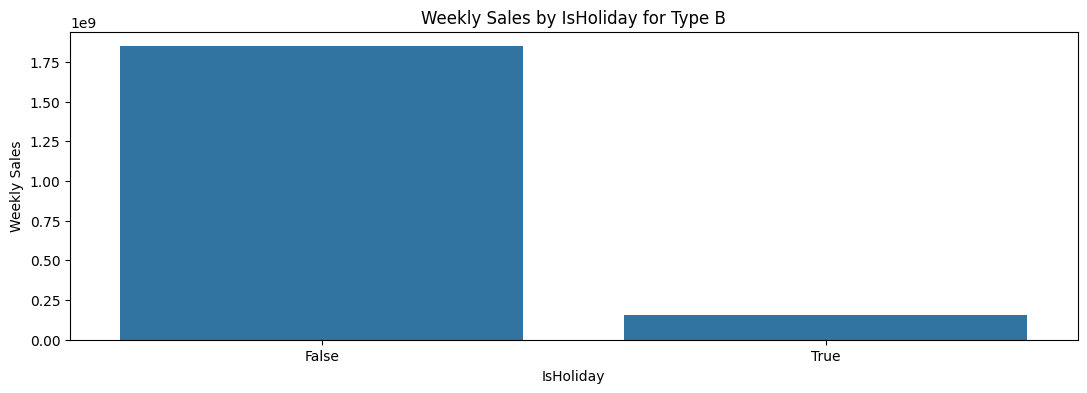

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the columns to verify
dftype_B=df[df['Type']=='B']
print(dftype_B.columns)

category_columns = ['Store', 'Type', 'Dept', 'IsHoliday']  # Ensure the column names match the DataFrame
sales_column = 'Weekly_Sales'  # Ensure the column name matches the DataFrame

for category_column in category_columns:
    if category_column in dftype_B.columns and sales_column in dftype_B.columns:
        plt.figure(figsize=(13, 4))

        # Aggregate the weekly sales by the specified column
        agg_df = dftype_B.groupby(category_column)[sales_column].sum().reset_index()

        # Plot the aggregated data
        sns.barplot(x=category_column, y=sales_column, data=agg_df)
        plt.title(f'Weekly Sales by {category_column} for Type B')
        plt.xlabel(category_column)
        plt.ylabel('Weekly Sales')
        plt.show()
    else:
        print(f"One or both columns '{category_column}' and '{sales_column}' are not found in the DataFrame.")


Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')


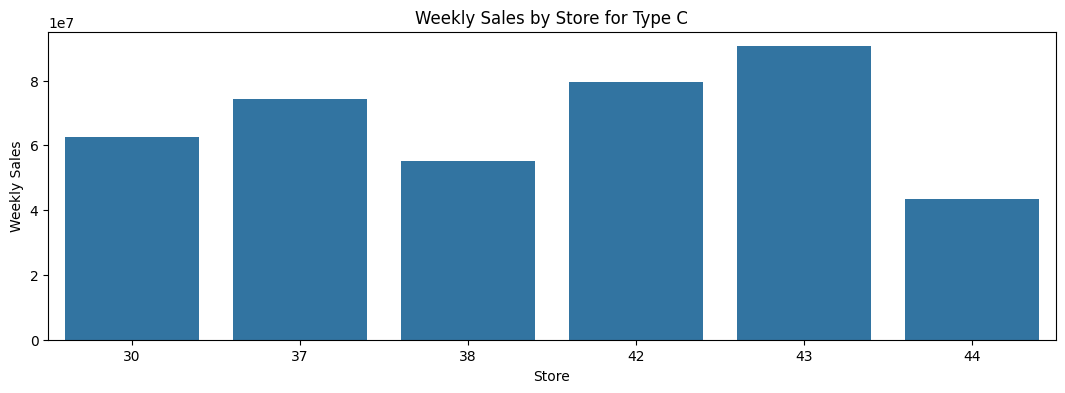

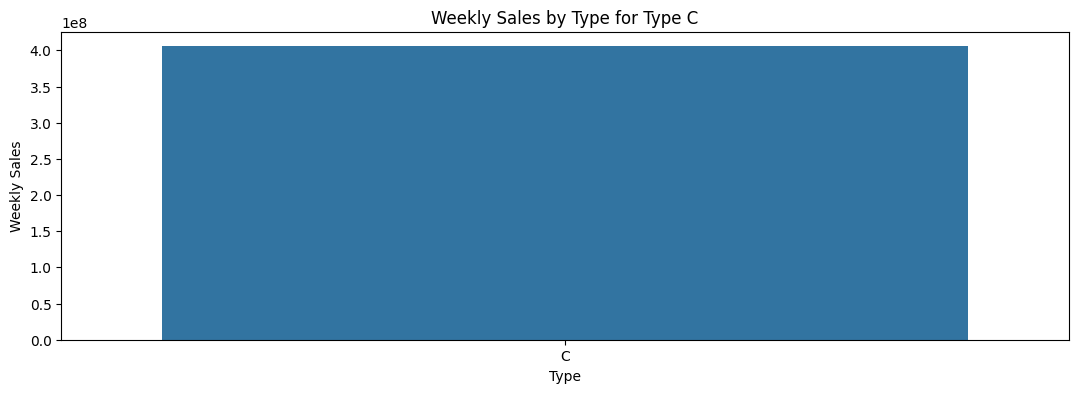

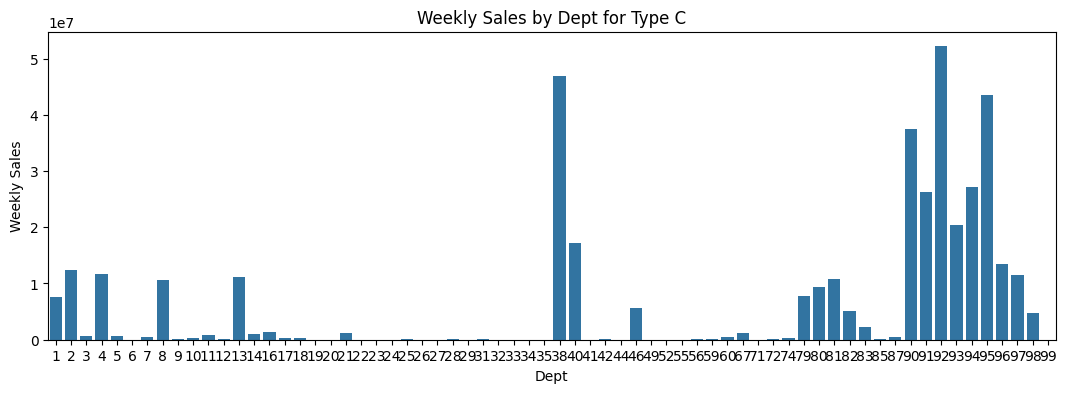

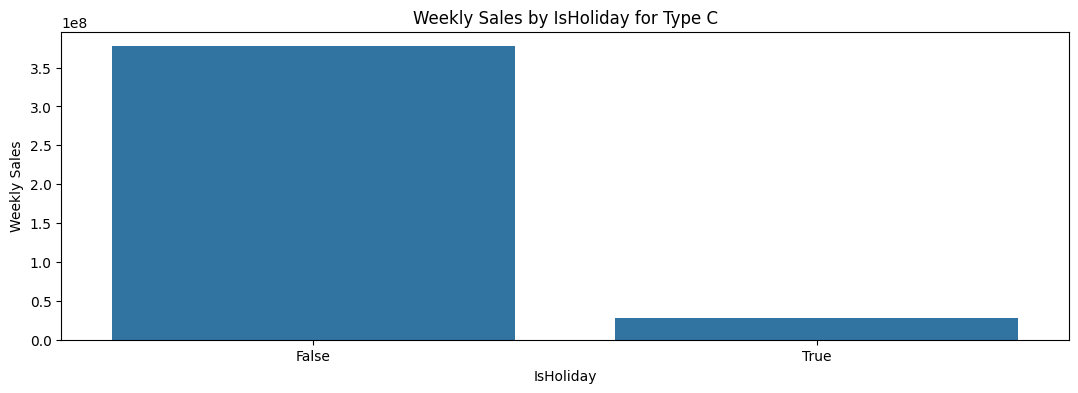

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the columns to verify
dftype_C=df[df['Type']=='C']
print(dftype_C.columns)

category_columns = ['Store', 'Type', 'Dept', 'IsHoliday']  # Ensure the column names match the DataFrame
sales_column = 'Weekly_Sales'  # Ensure the column name matches the DataFrame

for category_column in category_columns:
    if category_column in dftype_C.columns and sales_column in dftype_C.columns:
        plt.figure(figsize=(13, 4))

        # Aggregate the weekly sales by the specified column
        agg_df = dftype_C.groupby(category_column)[sales_column].sum().reset_index()

        # Plot the aggregated data
        sns.barplot(x=category_column, y=sales_column, data=agg_df)
        plt.title(f'Weekly Sales by {category_column} for Type C')
        plt.xlabel(category_column)
        plt.ylabel('Weekly Sales')
        plt.show()
    else:
        print(f"One or both columns '{category_column}' and '{sales_column}' are not found in the DataFrame.")


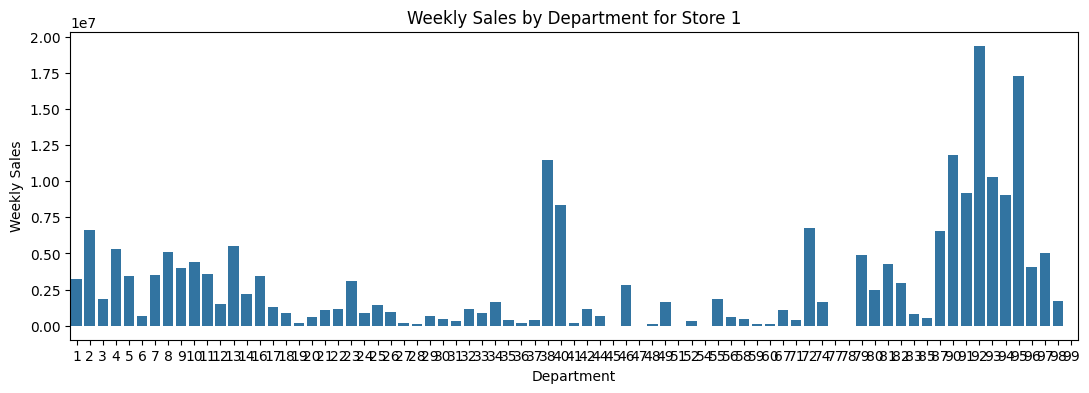

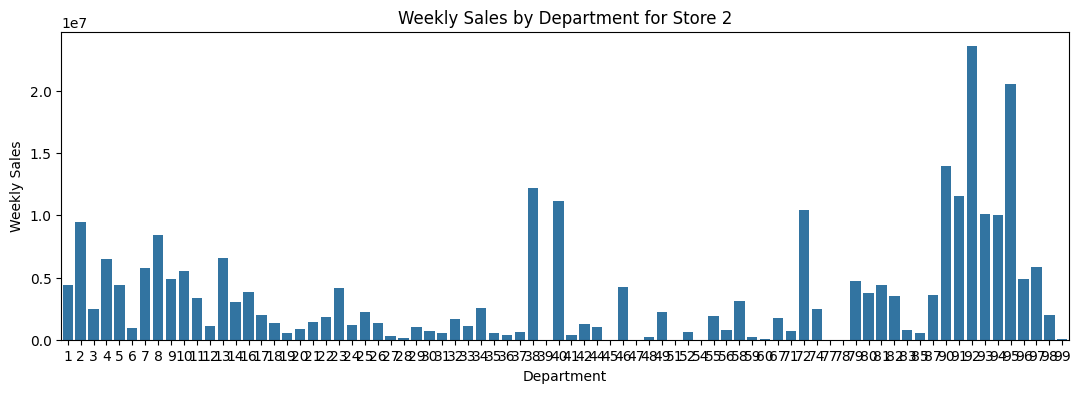

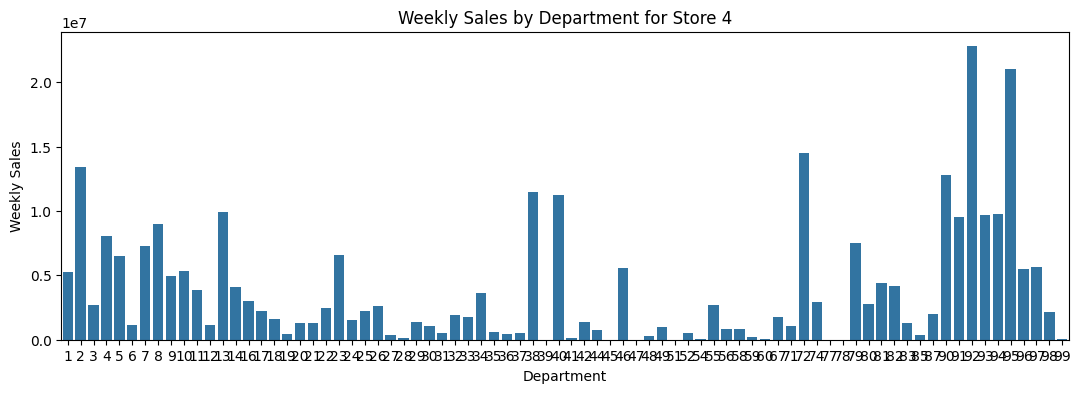

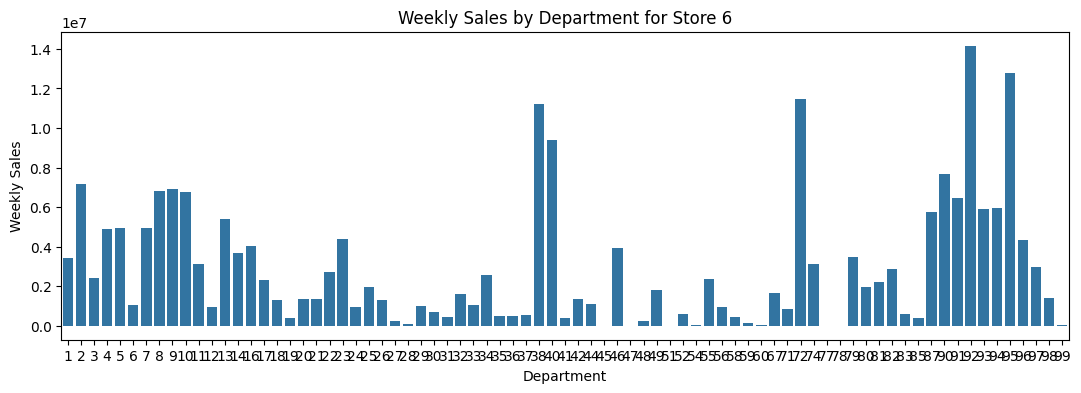

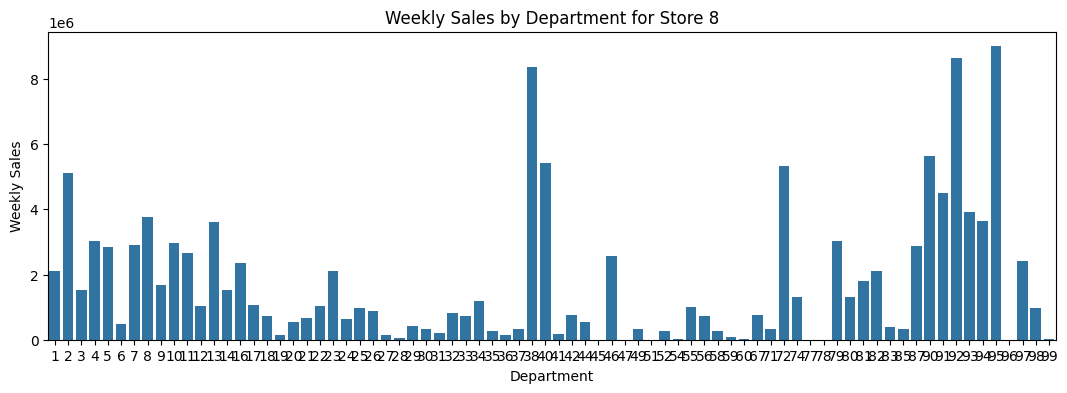

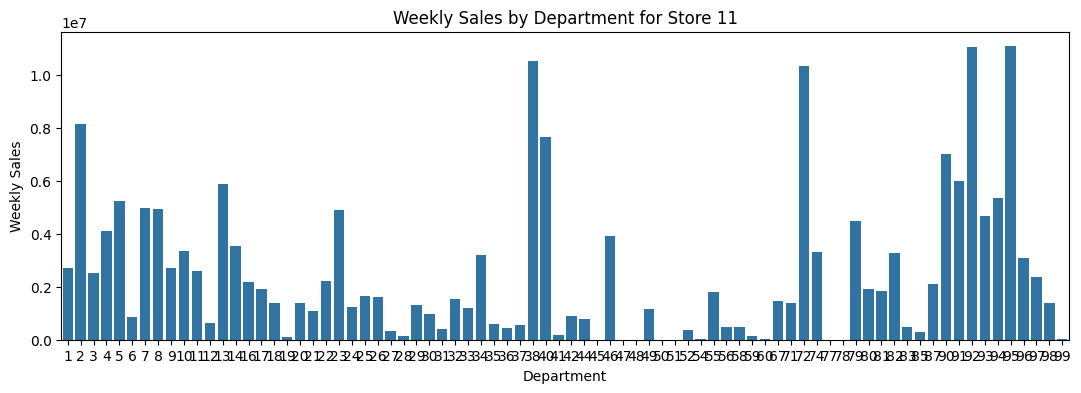

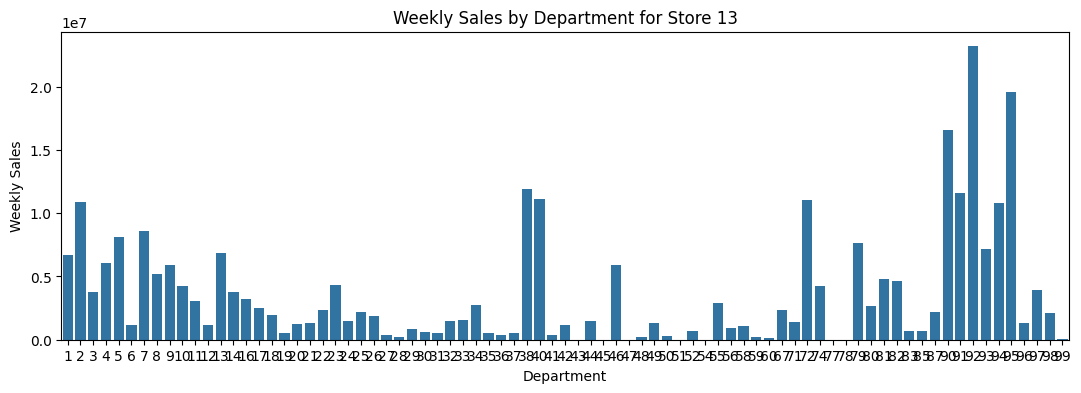

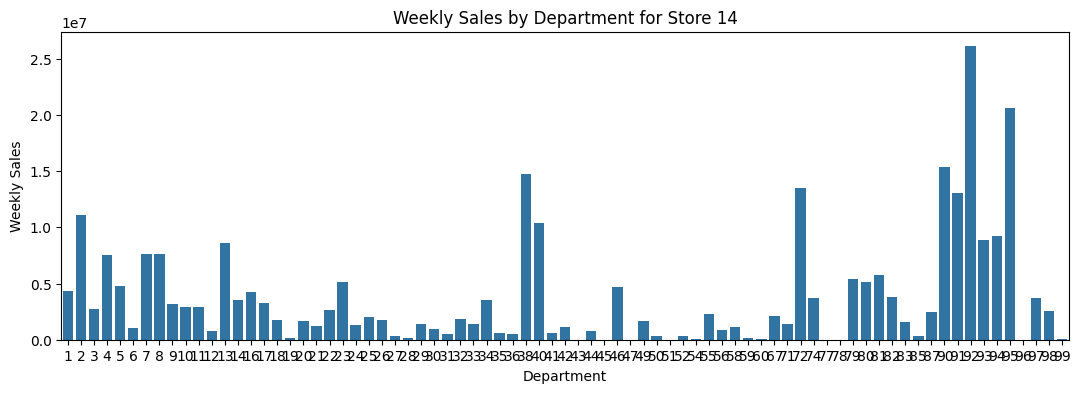

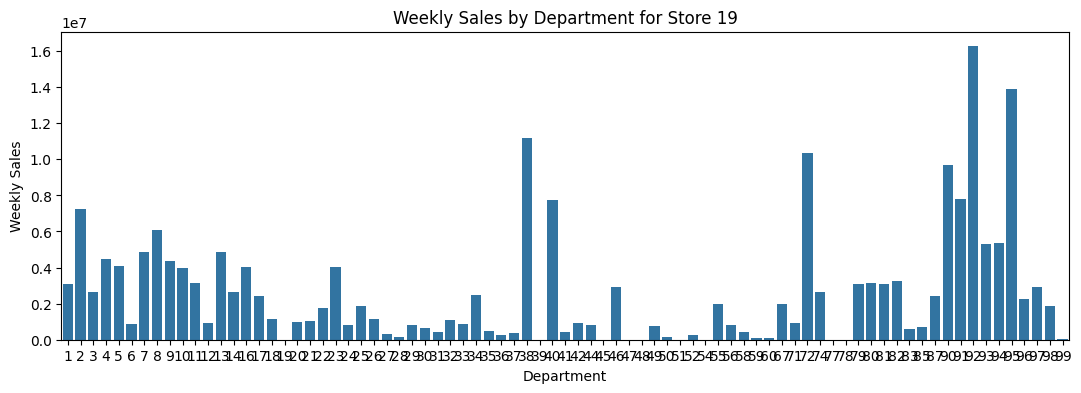

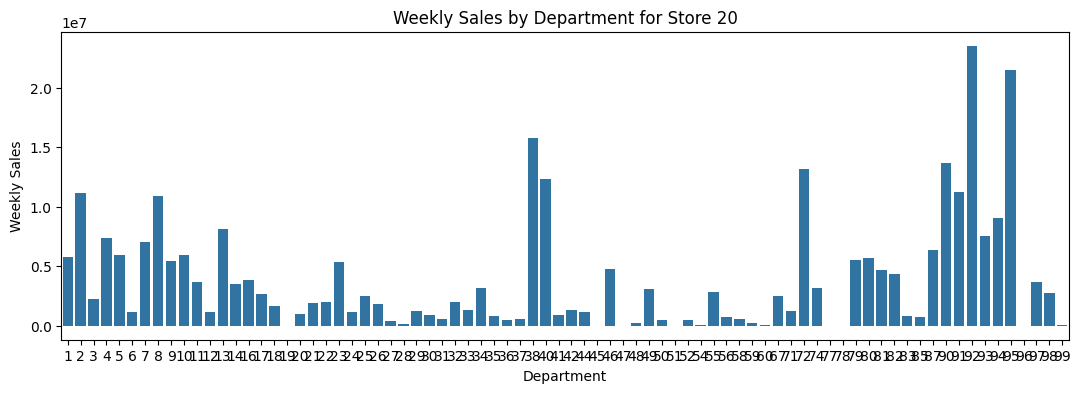

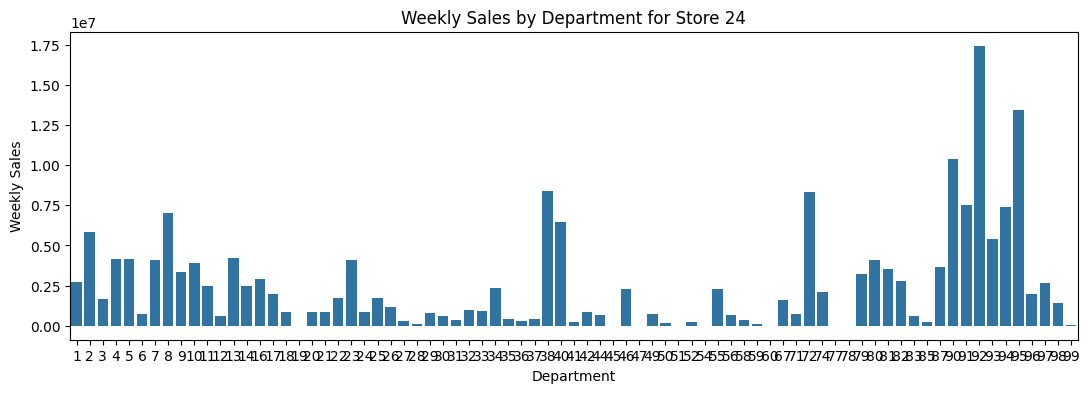

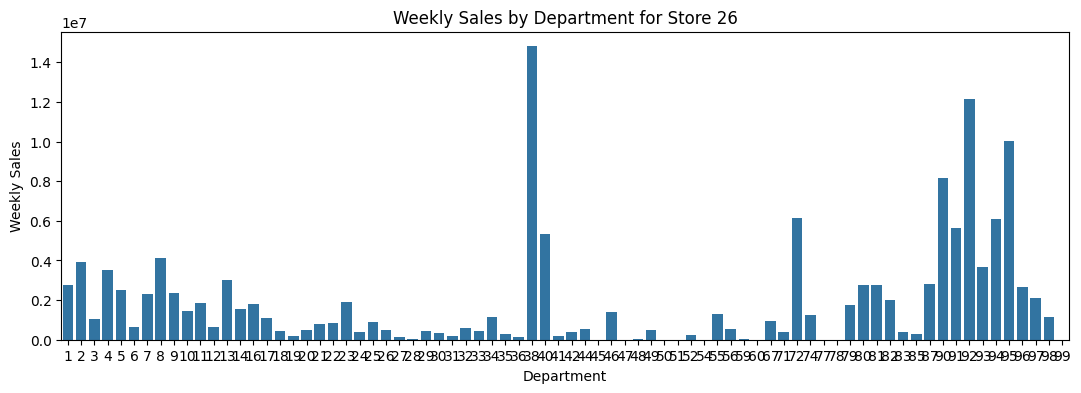

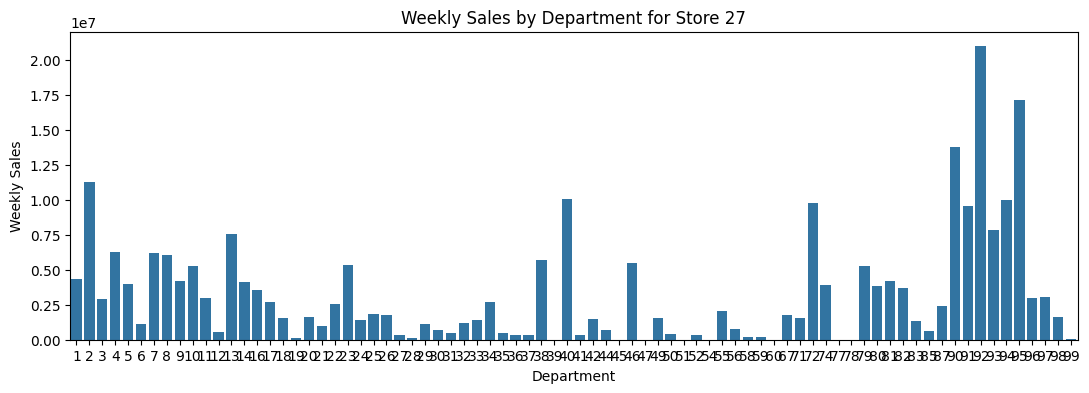

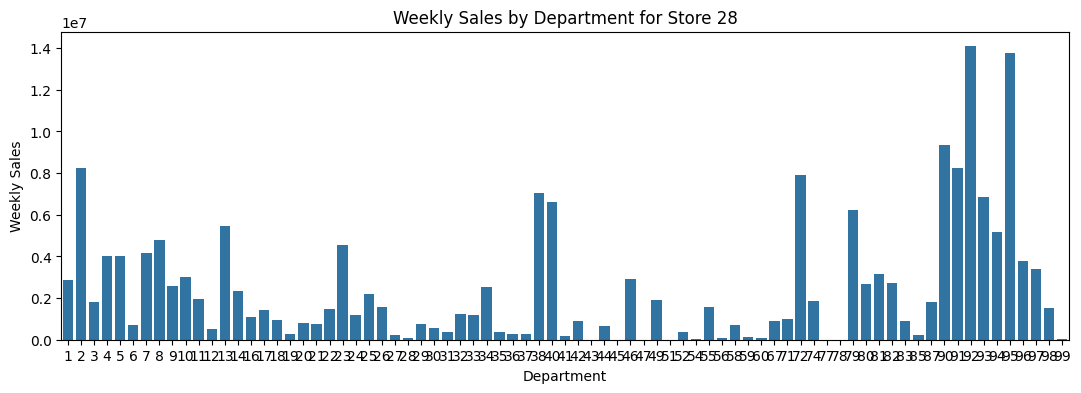

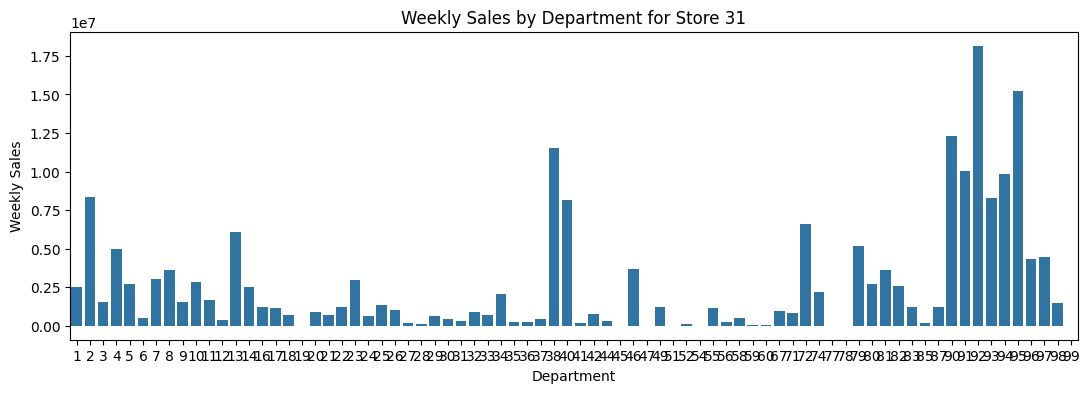

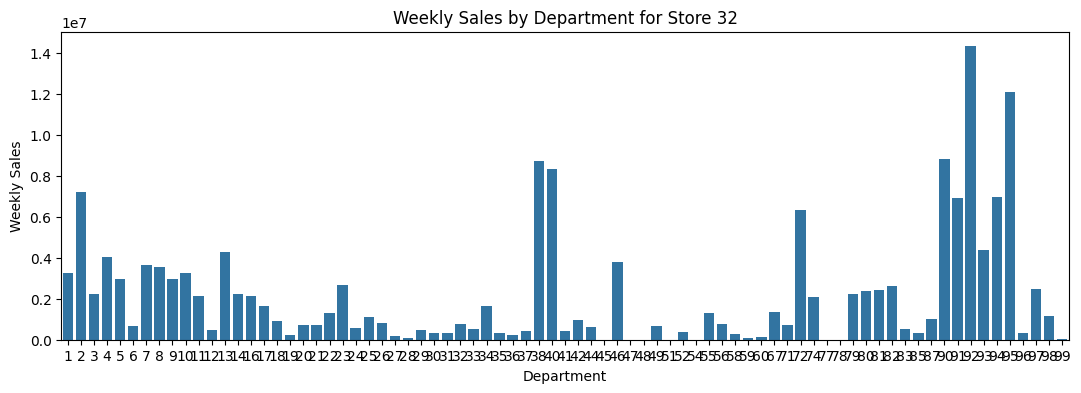

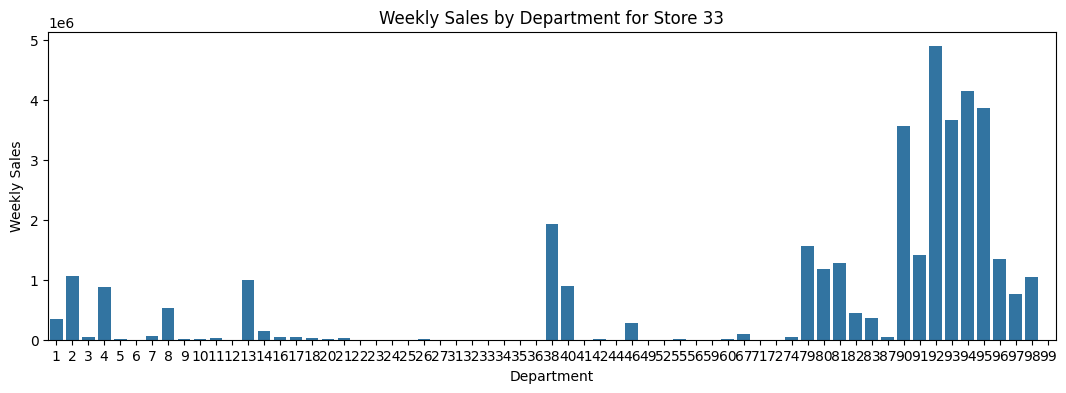

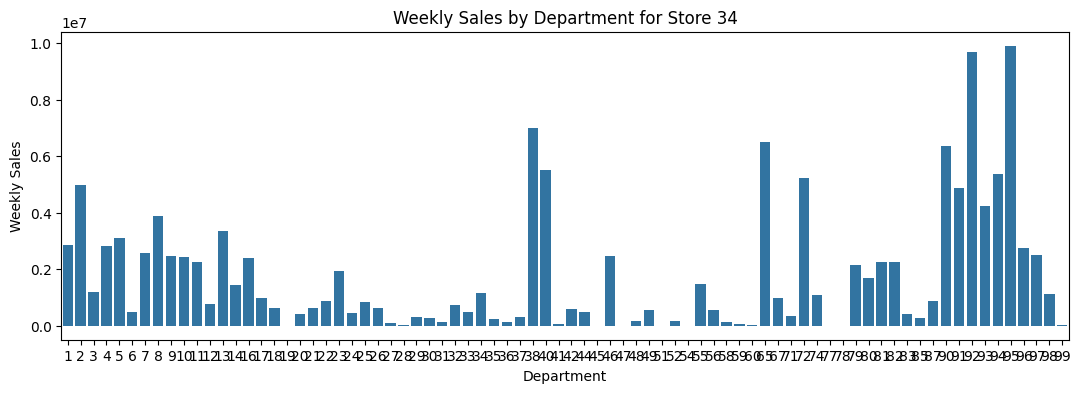

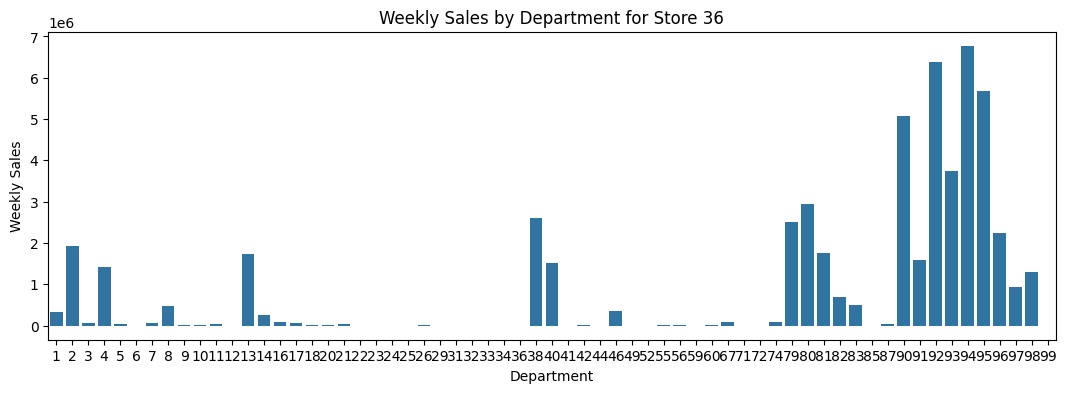

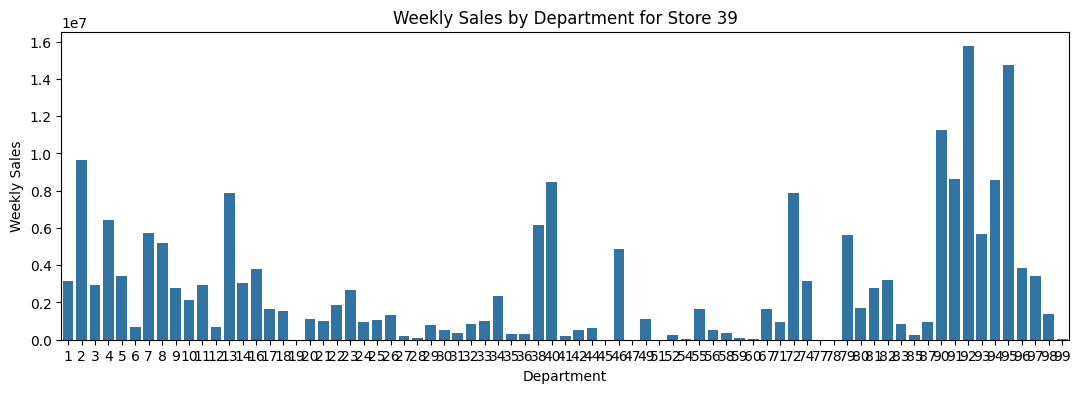

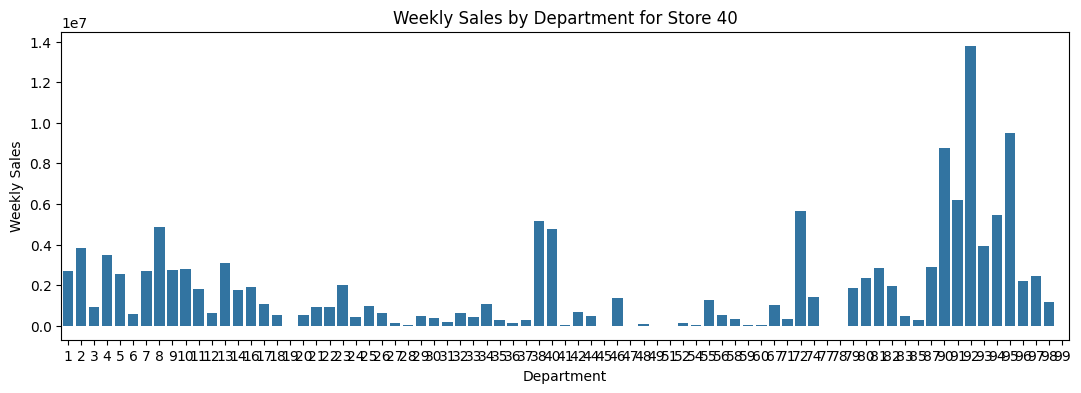

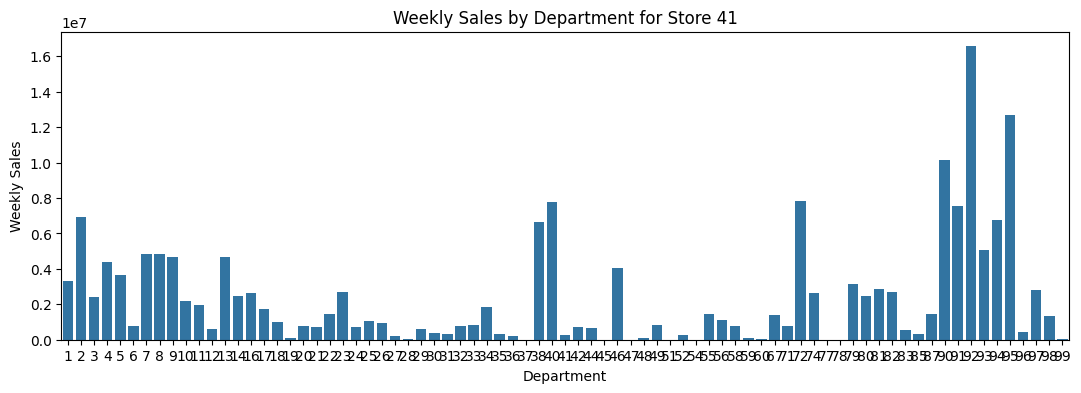

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for Type A stores
dftype_A = df[df['Type'] == 'A']

# Group by 'Store' and 'Dept', and sum the 'Weekly_Sales'
agg_df = dftype_A.groupby(['Store', 'Dept'])['Weekly_Sales'].sum().reset_index()

# Find the maximum weekly sales for any store
max_weekly_sales = agg_df.groupby('Store')['Weekly_Sales'].sum().max()

# Identify stores with total weekly sales above a certain threshold (e.g., 2 million)
threshold = 2.0e+06
stores_above_threshold = agg_df.groupby('Store')['Weekly_Sales'].sum()
stores_above_threshold = stores_above_threshold[stores_above_threshold > threshold].index.values

# Filter the aggregated DataFrame to include only those stores
agg_df_filtered = agg_df[agg_df['Store'].isin(stores_above_threshold)]

# Extract the unique stores that meet the threshold criteria
stores = agg_df_filtered['Store'].unique()

# Plot the weekly sales by department for each store
for store in stores:
    plt.figure(figsize=(13, 4))

    # Filter the data for the current store
    store_data = agg_df_filtered[agg_df_filtered['Store'] == store]

    # Create a bar plot for the store's weekly sales by department
    sns.barplot(x='Dept', y='Weekly_Sales', data=store_data)
    plt.title(f'Weekly Sales by Department for Store {store}')
    plt.xlabel('Department')
    plt.ylabel('Weekly Sales')
    plt.show()


In [33]:
agg_df.describe()

,Store,Dept,Weekly_Sales
count,1671.000000,1671.000000,1.671000e+03
mean,21.966487,45.884500,2.591870e+06
std,12.775072,29.982337,3.538168e+06
min,1.000000,1.000000,-2.562000e+03
25%,11.000000,21.000000,3.276960e+05
50%,24.000000,41.000000,1.209878e+06
75%,33.000000,74.000000,3.422059e+06
max,41.000000,99.000000,2.610150e+07


In [34]:
# Filter for Type B stores
df_type_b = df[df['Type'] == 'B']

# Filter for the month of April
df_type_b_april = df_type_b[df_type_b['Date'].dt.month == 4]

# Calculate the average Weekly_Sales (assuming it represents customer visits)
average_sales_april = df_type_b_april['Weekly_Sales'].mean()

average_sales_april

np.float64(11924.820053101768)

In [35]:
# Filter for Type B stores
df_type_b = df[df['Type'] == 'B']

# Filter for the month of April
df_type_b_april = df_type_b[df_type_b['Date'].dt.month == 6]

# Calculate the average Weekly_Sales (assuming it represents customer visits)
average_sales_april = df_type_b_april['Weekly_Sales'].mean()

average_sales_april

np.float64(12607.394152347451)

# Identifying Best average sales in holiday week for all store types

In [36]:

# Filter for holiday weeks
df_holiday = df[df['IsHoliday'] == True]

# Group by store type and calculate the average sales
average_sales_holiday = df_holiday.groupby('Type')['Weekly_Sales'].mean()

# Identify the store type with the highest average sales
best_avg_sales_type = average_sales_holiday.idxmax()
best_avg_sales_value = average_sales_holiday.max()

best_avg_sales_type, best_avg_sales_value

('A', np.float64(21297.51782416859))

# Finding Which store had a worst sales in leap year

In [37]:
# Define the leap years we are interested in
leap_years = [year for year in range(2000, 2101) if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)]

# Filter for data in leap years
df_leap_years = df[df['Date'].dt.year.isin(leap_years)]

# Check if the filtered DataFrame is empty
if df_leap_years.empty:
    print("No data available for leap years in the dataset.")
else:
    # Aggregate sales data by store
    store_sales_leap_years = df_leap_years.groupby('Store')['Weekly_Sales'].sum()

    # Identify the store with the worst (lowest) total sales
    worst_sales_store = store_sales_leap_years.idxmin()
    worst_sales_value = store_sales_leap_years.min()

    print(f"Store with the worst sales in leap years: {worst_sales_store}")
    print(f"Worst sales value in leap years: {worst_sales_value}")

Store with the worst sales in leap years: 33
Worst sales value in leap years: 11435551.03


In [38]:
# Find the store with the maximum sum of weekly sales
max_store = df.groupby('Store')['Weekly_Sales'].sum().idxmax()

# Calculate 25% of the weekly sales of the store with the maximum sum
threshold = 0.25 * df.groupby('Store')['Weekly_Sales'].sum().loc[max_store]

# Filter out the stores below 25% of the max store's weekly sales
below_threshold_stores = df.groupby('Store')['Weekly_Sales'].sum().loc[lambda x: x < threshold].index

print("Stores below 25% of the store with the maximum sum of weekly sales:")
print(below_threshold_stores)

Stores below 25% of the store with the maximum sum of weekly sales:
Index([3, 5, 16, 30, 33, 36, 37, 38, 44], dtype='int64', name='Store')


In [39]:
# Filter out the rows for the stores below 25% of the max store's weekly sales
below_threshold_stores_df = df[df['Store'].isin(below_threshold_stores)]

# Get the types of these stores
store_types = below_threshold_stores_df.groupby('Store')['Type'].first()

print("Types of stores below 25% of the store with the maximum sum of weekly sales:")
print(store_types)


Types of stores below 25% of the store with the maximum sum of weekly sales:
Store
3     B
5     B
16    B
30    C
33    A
36    A
37    C
38    C
44    C
Name: Type, dtype: object


In [30]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')

In [40]:
# Define the unemployment rate threshold
unemployment_threshold = df['Unemployment'].mean()  # or set a specific threshold value

# Filter the dataset based on the unemployment rate
filtered_df = df[df['Unemployment'] > unemployment_threshold]

# Group by department and calculate the mean sales
expected_sales_by_dept = filtered_df.groupby('Dept')['Weekly_Sales'].mean()

print("Expected sales of each department when the unemployment factor is greater than the threshold:")
print(expected_sales_by_dept)

Expected sales of each department when the unemployment factor is greater than the threshold:
Dept
1     17723.870339
2     43438.570078
3     11094.697130
4     25120.851801
5     19859.029007
          ...     
95    68615.460195
96    15571.326511
97    13150.591941
98     6266.336566
99      340.256400
Name: Weekly_Sales, Length: 81, dtype: float64


# sales of each department on month wise

In [41]:

# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for the month-year
df['month_year'] = df['Date'].dt.to_period('M')

# Group by the new month-year column and department, and aggregate the sales by summing them
monthly_sales = df.groupby(['month_year', 'Dept'])['Weekly_Sales'].sum().reset_index()

print("Monthly net sales of each department:")
print(monthly_sales)

Monthly net sales of each department:
     month_year  Dept  Weekly_Sales
0       2010-02     1    4138664.75
1       2010-02     2    7658267.17
2       2010-02     3    1739169.28
3       2010-02     4    4470499.52
4       2010-02     5    4231371.27
...         ...   ...           ...
2589    2012-10    95   12315979.20
2590    2012-10    96    2147132.34
2591    2012-10    97    2570324.74
2592    2012-10    98    1171256.97
2593    2012-10    99      13654.02

[2594 rows x 3 columns]


# Identifying Which store performs high sales in week wise

In [42]:

# Group by store and date, and sum the weekly sales
weekly_sales = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

# Find the store with the highest sales for each week
max_weekly_sales = weekly_sales.loc[weekly_sales.groupby('Date')['Weekly_Sales'].idxmax()]

# Sum of weekly sales for each unique store
store_total_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values(by='Weekly_Sales', ascending=False)

print("Store with the highest sales week by week:")
print(max_weekly_sales)

print("\nSum of weekly sales for each unique store:")
print(store_total_sales)

     

Store with the highest sales week by week:
      Store       Date  Weekly_Sales
1859     14 2010-02-05    2623469.95
430       4 2010-02-12    2188307.39
1861     14 2010-02-19    2204556.70
1862     14 2010-02-26    2095591.63
1863     14 2010-03-05    2237544.75
...     ...        ...           ...
567       4 2012-09-28    2027620.23
2856     20 2012-10-05    2246411.89
2857     20 2012-10-12    2162951.36
570       4 2012-10-19    2097266.85
571       4 2012-10-26    2149594.46

[143 rows x 3 columns]

Sum of weekly sales for each unique store:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.

# Better department performance based on the store on all the week

In [43]:
# Group by store and department, and sum the weekly sales
store_dept_sales = df.groupby(['Store', 'Dept'])['Weekly_Sales'].sum().reset_index()

# Find the department with the highest total sales for each store
max_dept_sales = store_dept_sales.loc[store_dept_sales.groupby('Store')['Weekly_Sales'].idxmax()]

# Sort departments based on their total sales across all stores
sorted_dept_sales = store_dept_sales.groupby('Dept')['Weekly_Sales'].sum().reset_index().sort_values(by='Weekly_Sales', ascending=False)

print("Department with the highest total sales for each store:")
print(max_dept_sales)

print("\nSorted departments based on their total sales across all stores:")
print(sorted_dept_sales)
     

Department with the highest total sales for each store:
      Store  Dept  Weekly_Sales
69        1    92   19370632.64
147       2    92   23572153.03
190       3    38   15529566.07
297       4    92   22789210.43
340       5    38    7893570.24
446       6    92   14160545.90
509       7    72    6447844.96
601       8    95    9002059.31
641       9    38   11184287.78
736      10    72   20410926.56
829      11    95   11080680.91
835      12     2   10652763.01
980      13    92   23170876.20
1057     14    92   26101497.71
1101     15    38    7517821.66
1179     16    38    7447254.23
1255     17    38   11059588.03
1331     18    38    9339684.03
1445     19    92   16261990.45
1523     20    92   23542625.04
1532     21     2    6832625.68
1643     22    38   10015536.66
1740     23    72   10988695.25
1830     24    92   17429136.57
1874     25    38    6381753.99
1950     26    38   14800243.10
2061     27    92   20952094.22
2138     28    92   14083635.33
2181     29    3

# overall performance of the store based on year wise

In [44]:

# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'date' column
df['Year'] = df['Date'].dt.year

# Group by store and year, and sum the weekly sales
store_yearly_sales = df.groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()

# Calculate the total sales for each store for each year
total_sales_yearly = store_yearly_sales.groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()

print("Overall performance of each store based on year wise:")
print(total_sales_yearly)

Overall performance of each store based on year wise:
     Store  Year  Weekly_Sales
0        1  2010   73278832.00
1        1  2011   80921918.83
2        1  2012   68202058.02
3        2  2010   95277864.19
4        2  2011   98607881.42
..     ...   ...           ...
130     44  2011   15498194.67
131     44  2012   14187373.72
132     45  2010   38536343.37
133     45  2011   41135367.88
134     45  2012   32723630.17

[135 rows x 3 columns]


# performance of the store on week wise with without offers

In [45]:

# Group by store and date, and sum the weekly sales
store_weekly_sales = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

# Remove rows with offers (assuming offers are indicated by markdowns)
store_weekly_sales_without_offers = store_weekly_sales[df['MarkDown1'] == 0]

# Calculate the total weekly sales for each store without considering offers
total_sales_without_offers = store_weekly_sales_without_offers.groupby('Store')['Weekly_Sales'].sum().reset_index()

print("Performance of each store on a week-by-week basis without considering offers:")
print(total_sales_without_offers)

Performance of each store on a week-by-week basis without considering offers:
    Store  Weekly_Sales
0       1  1.400004e+08
1       2  1.756712e+08
2       3  3.578496e+07
3       4  1.861762e+08
4       5  2.824772e+07
5       6  1.422614e+08
6       7  5.034417e+07
7       8  8.219046e+07
8       9  4.845933e+07
9      10  1.740221e+08
10     11  1.228531e+08
11     12  9.101105e+07
12     13  1.800179e+08
13     14  1.923310e+08
14     15  5.790271e+07
15     16  4.704272e+07
16     17  8.924350e+07
17     18  1.013507e+08
18     19  1.330487e+08
19     20  1.924654e+08
20     21  6.877347e+07
21     22  9.418556e+07
22     23  1.268740e+08
23     24  1.250538e+08
24     25  6.482778e+07
25     26  9.196936e+07
26     27  1.641088e+08
27     28  1.212336e+08
28     29  4.963155e+07
29     30  4.104857e+07
30     31  1.266293e+08
31     32  1.060002e+08
32     33  2.430635e+07
33     34  8.856329e+07
34     35  8.855413e+07
35     36  3.591366e+07
36     37  4.759399e+07
37     38 

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_15984\206186020.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [46]:
import seaborn as sns
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

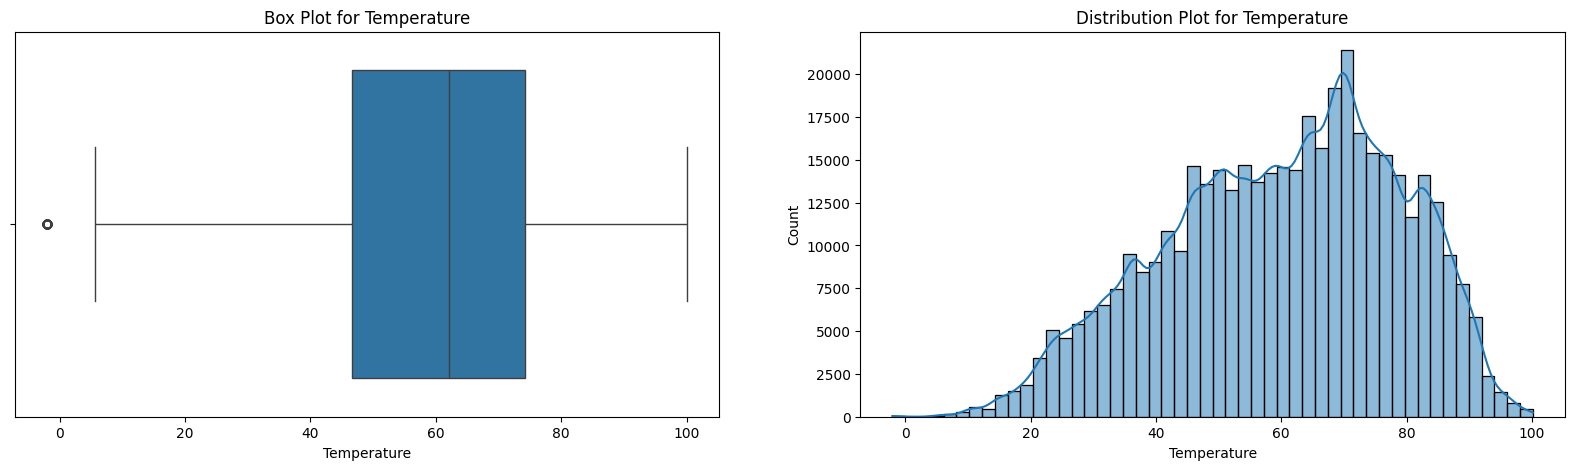

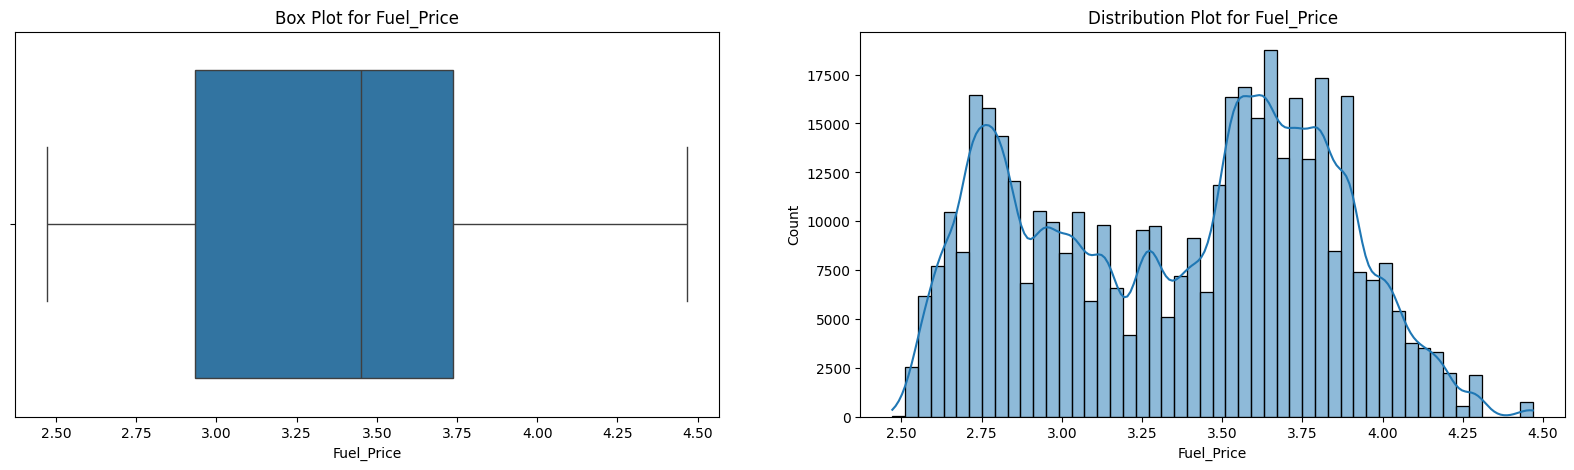

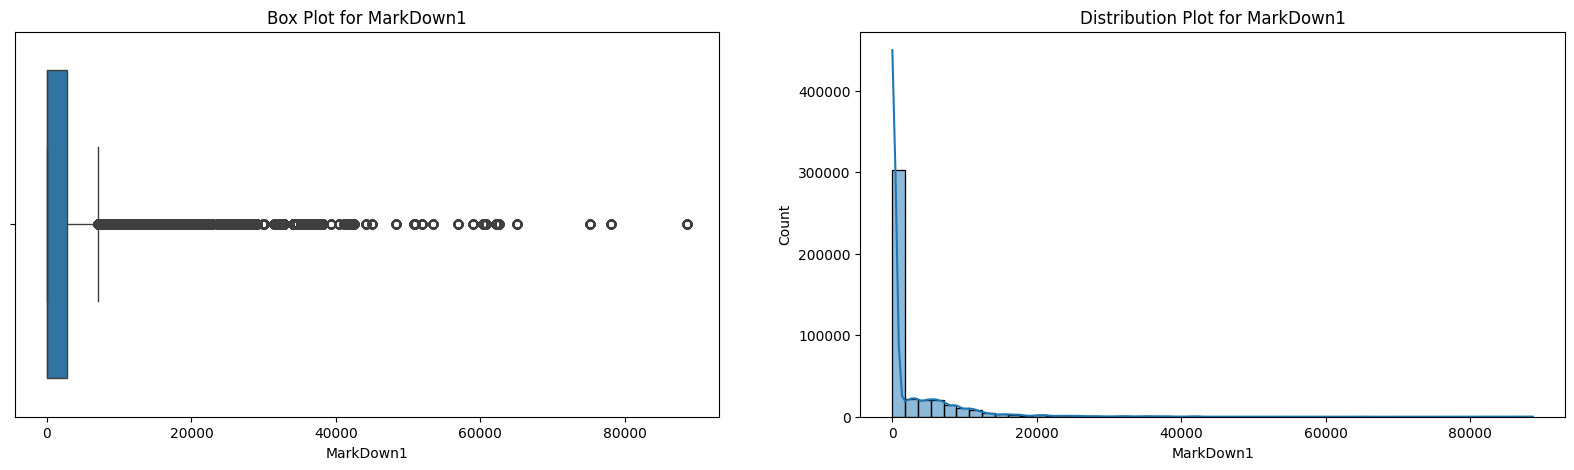

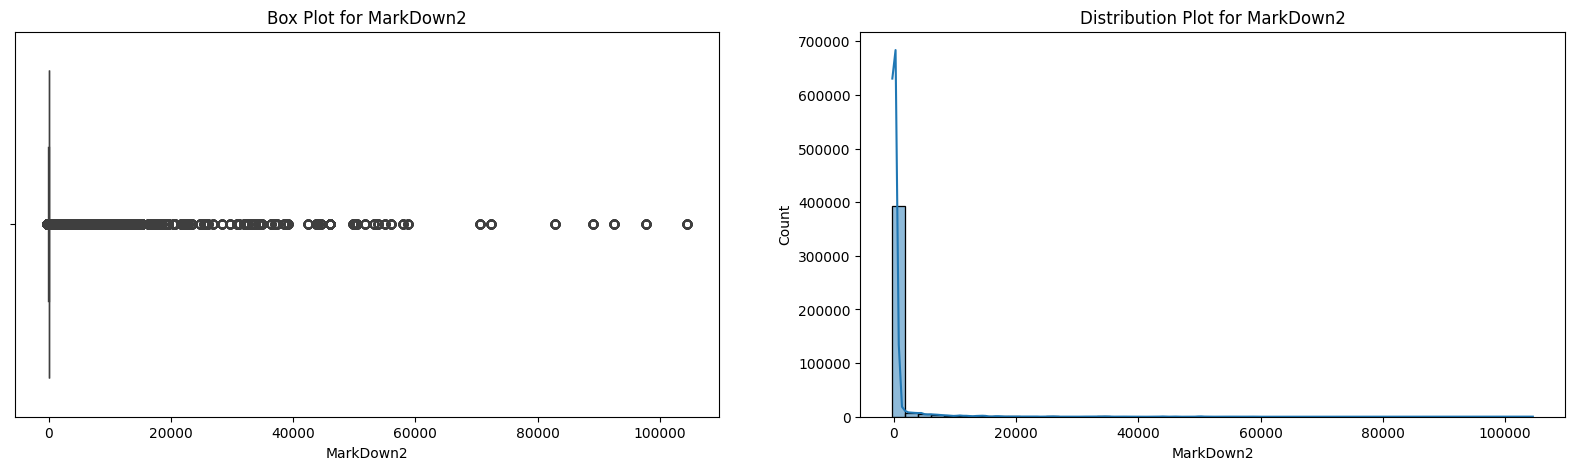

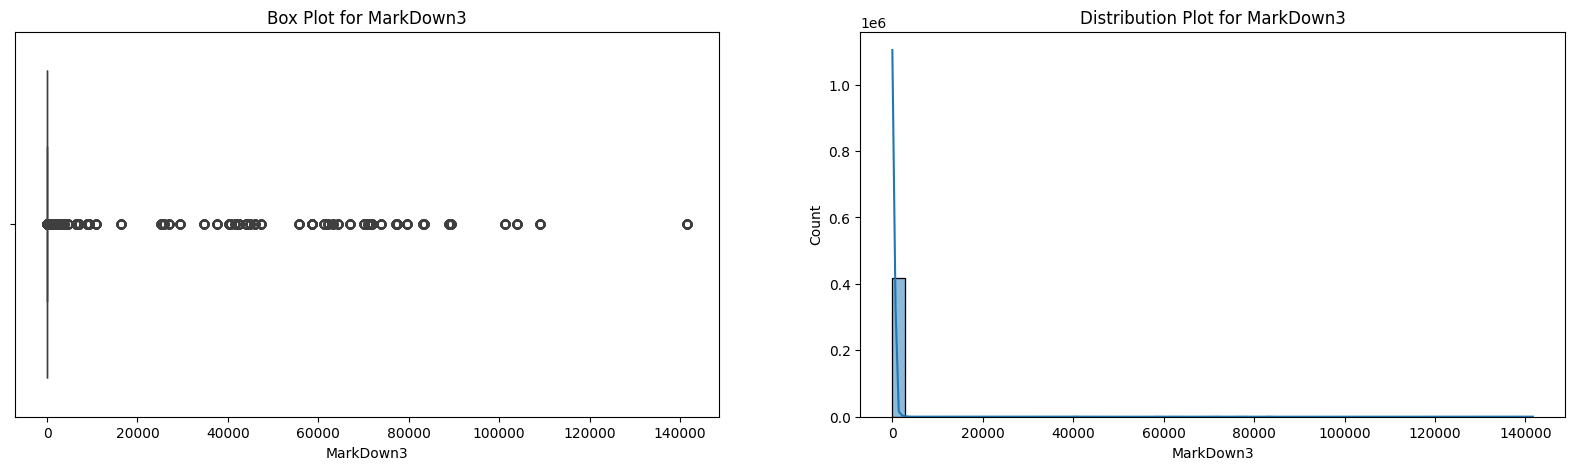

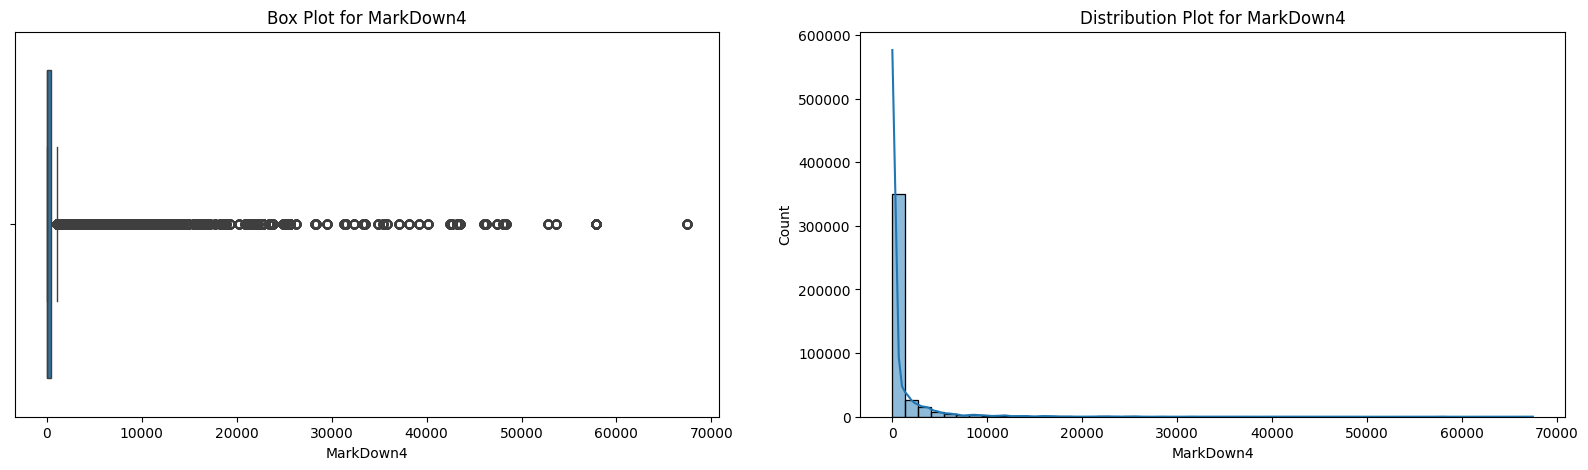

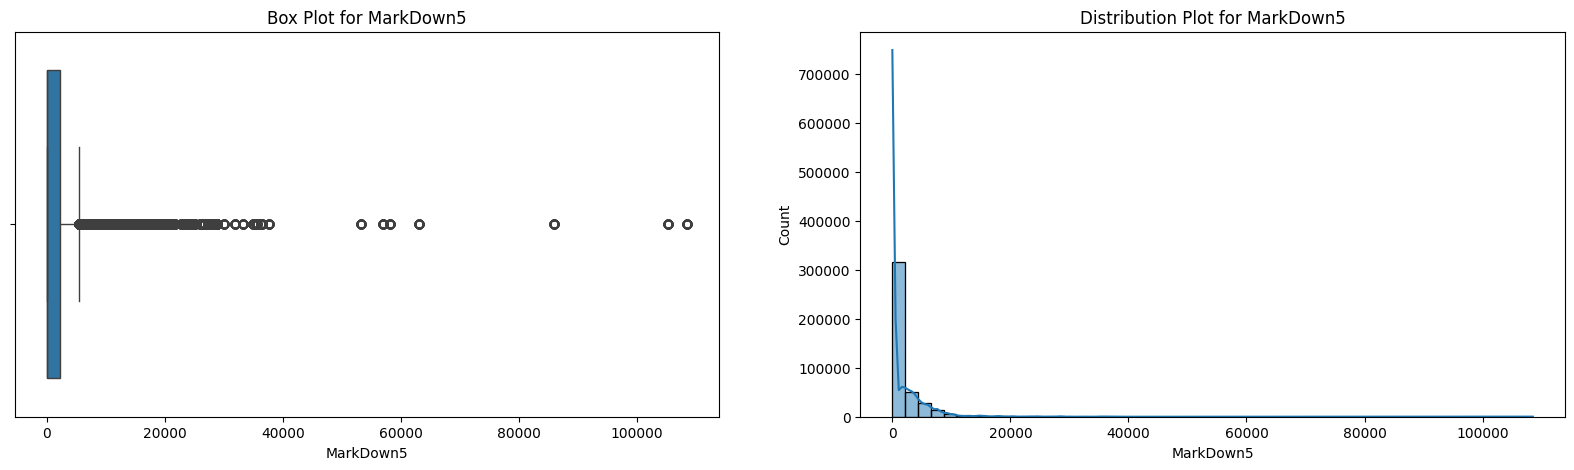

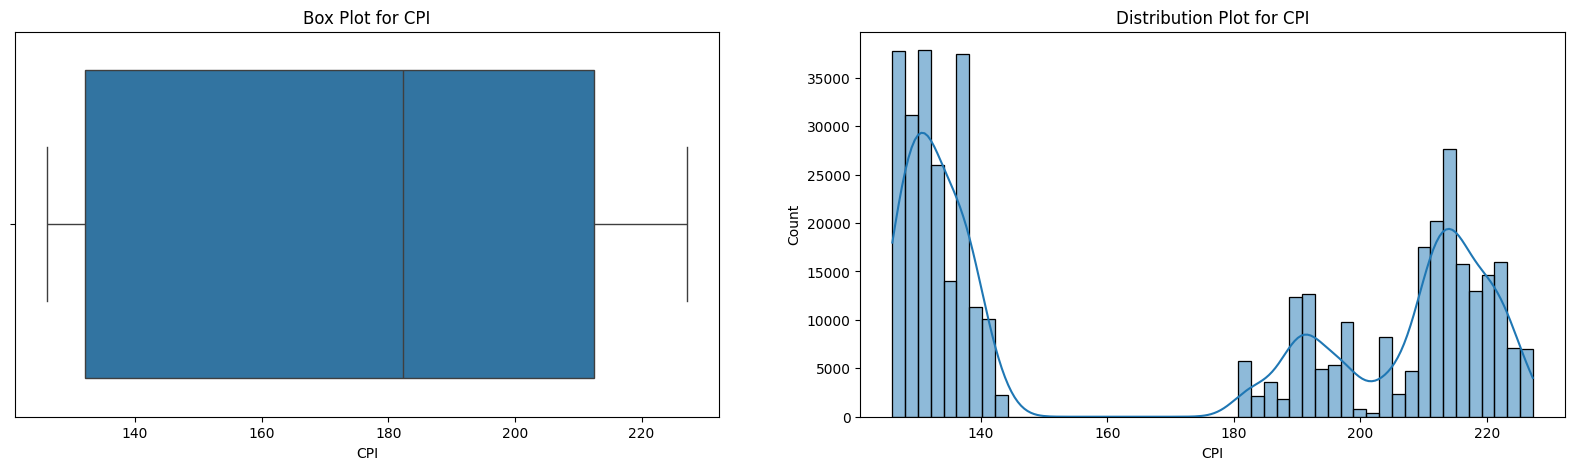

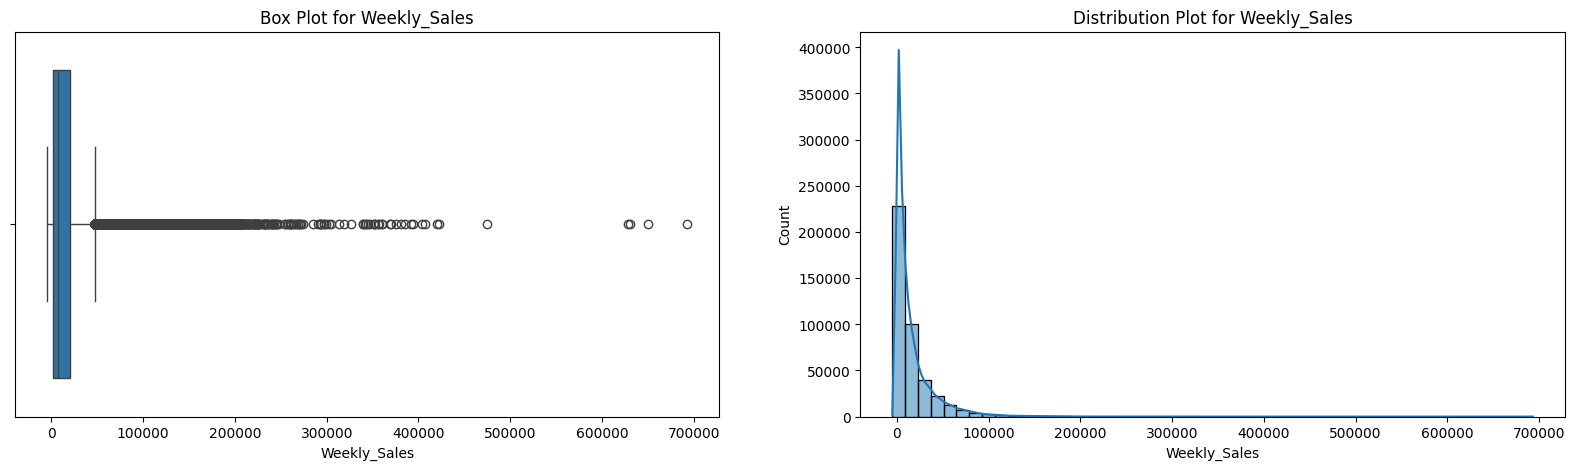

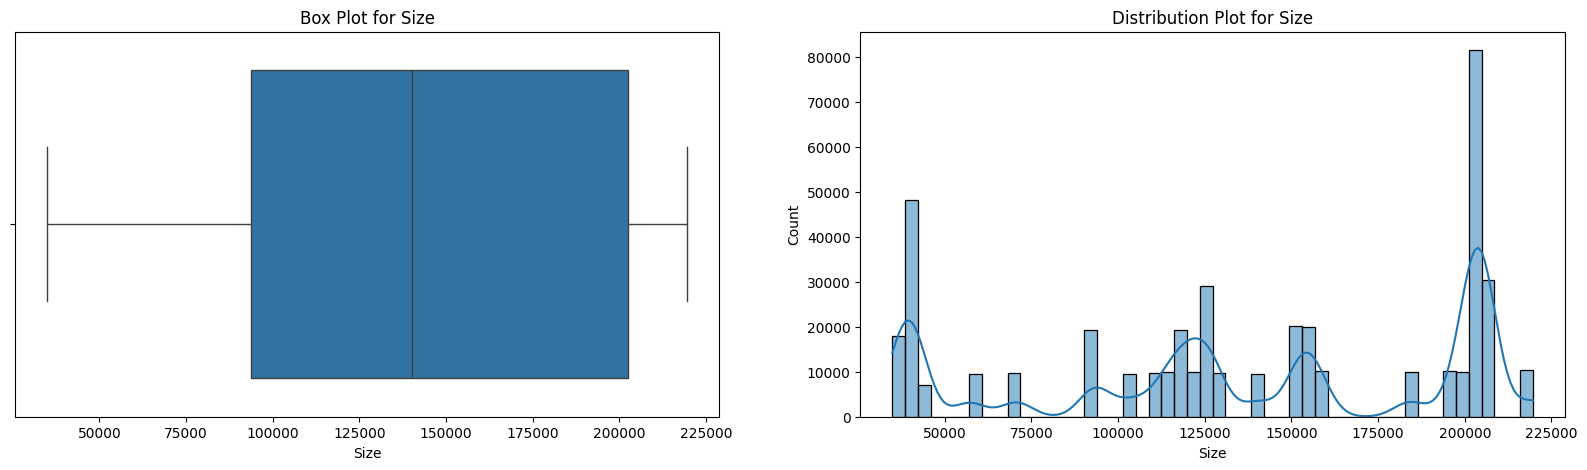

In [47]:
continuous_columns = ['Temperature','Fuel_Price','MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI',
                      'Weekly_Sales','Size']
for i in continuous_columns:
    plot(df, i)

In [48]:
df1 = df.copy()

In [49]:

# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df1, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
     

In [50]:
outlier(df1, 'MarkDown1')
outlier(df1, 'MarkDown2')
outlier(df1, 'MarkDown3')
outlier(df1, 'MarkDown4')
outlier(df1, 'MarkDown5')

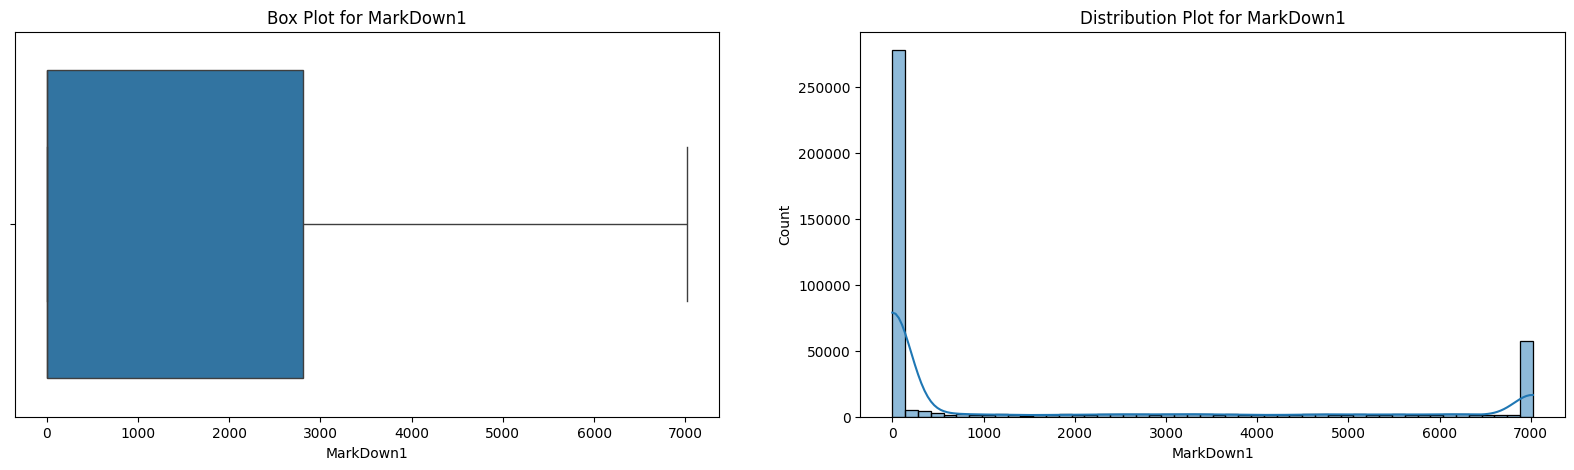

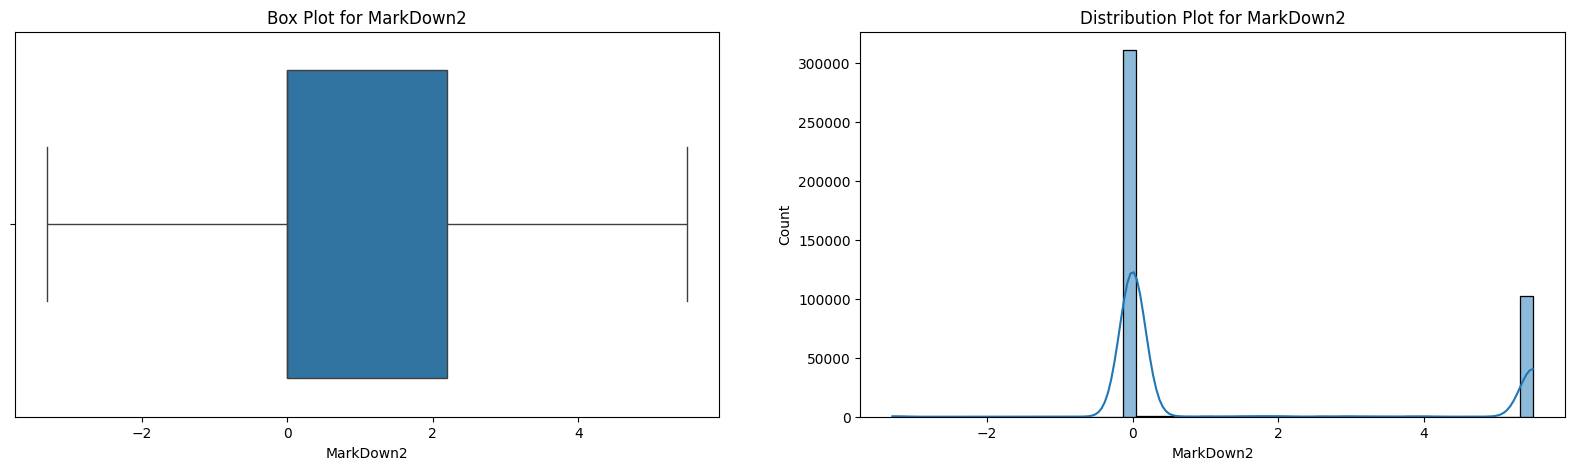

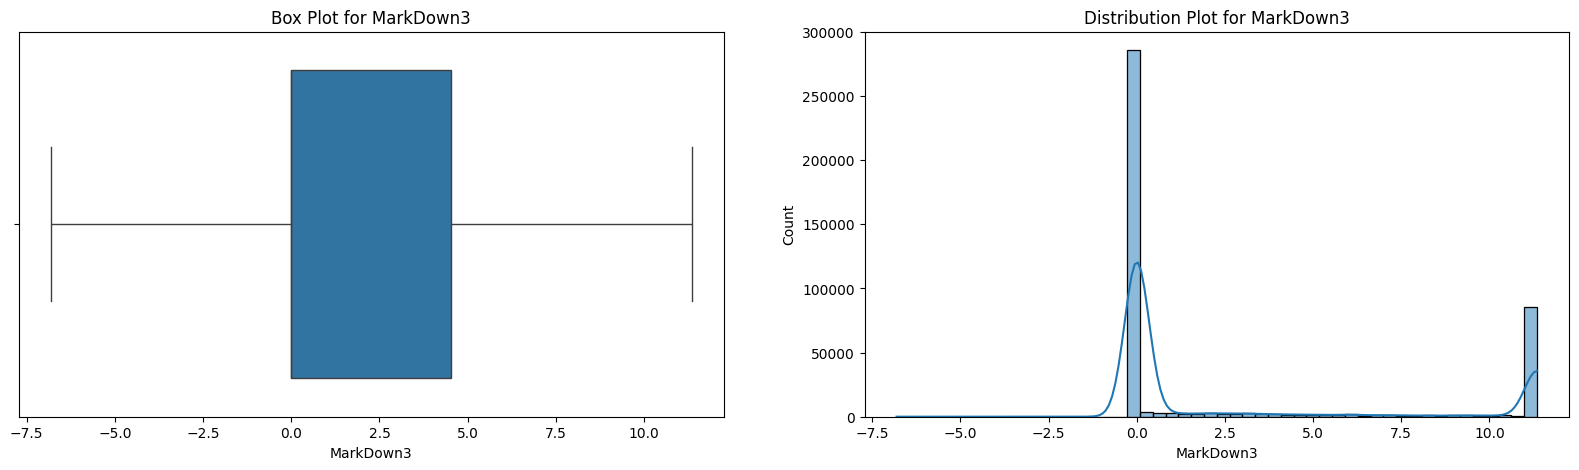

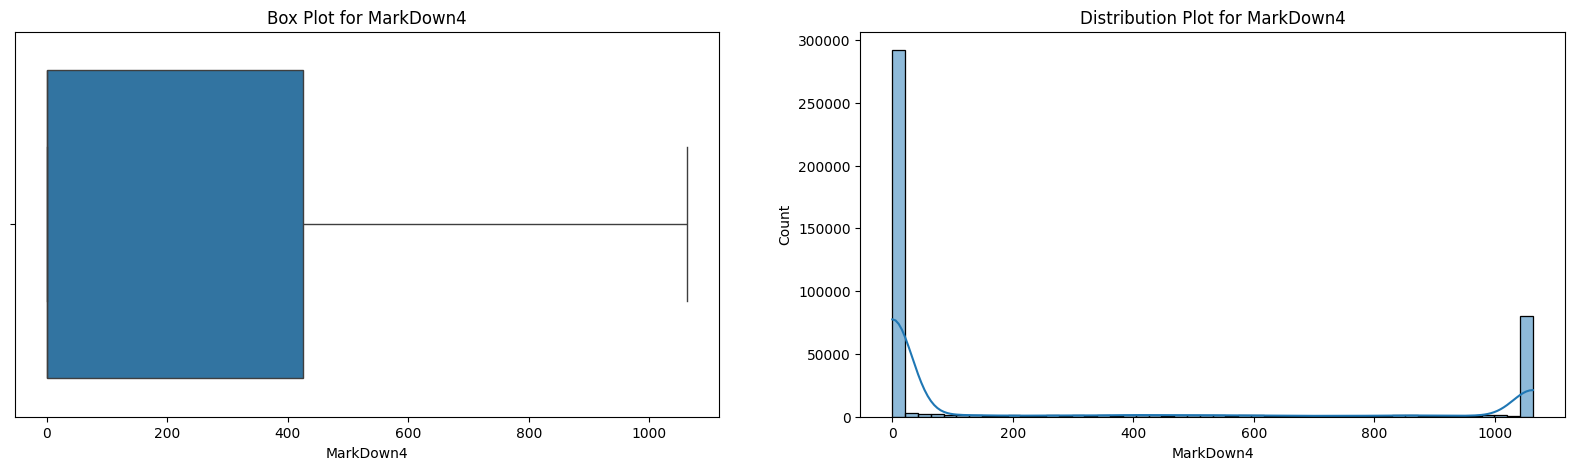

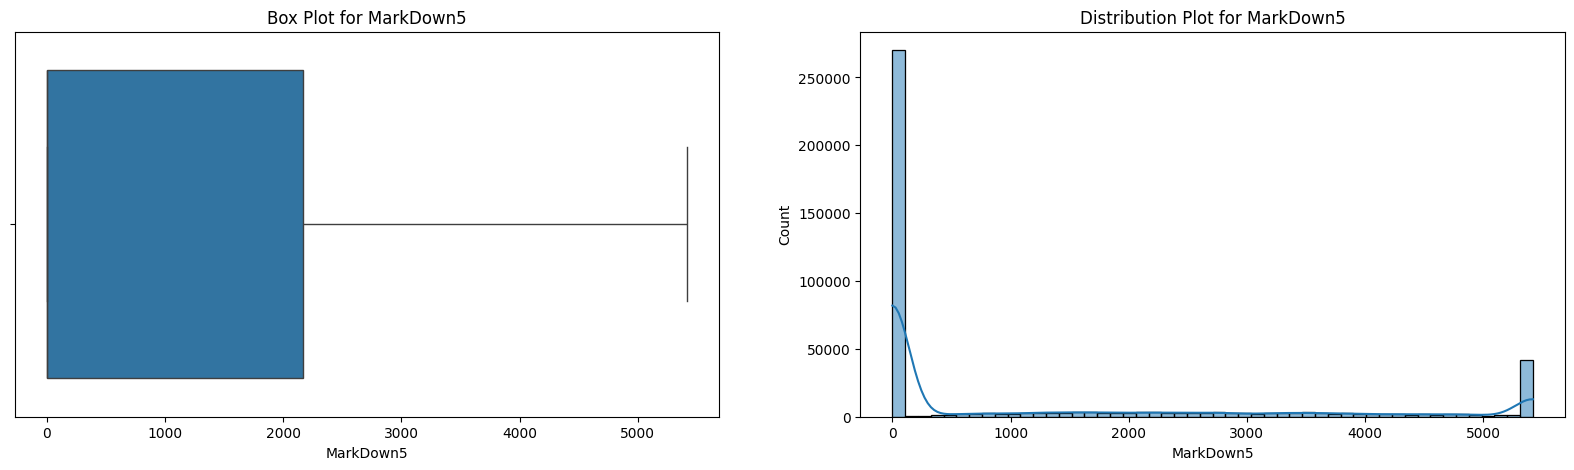

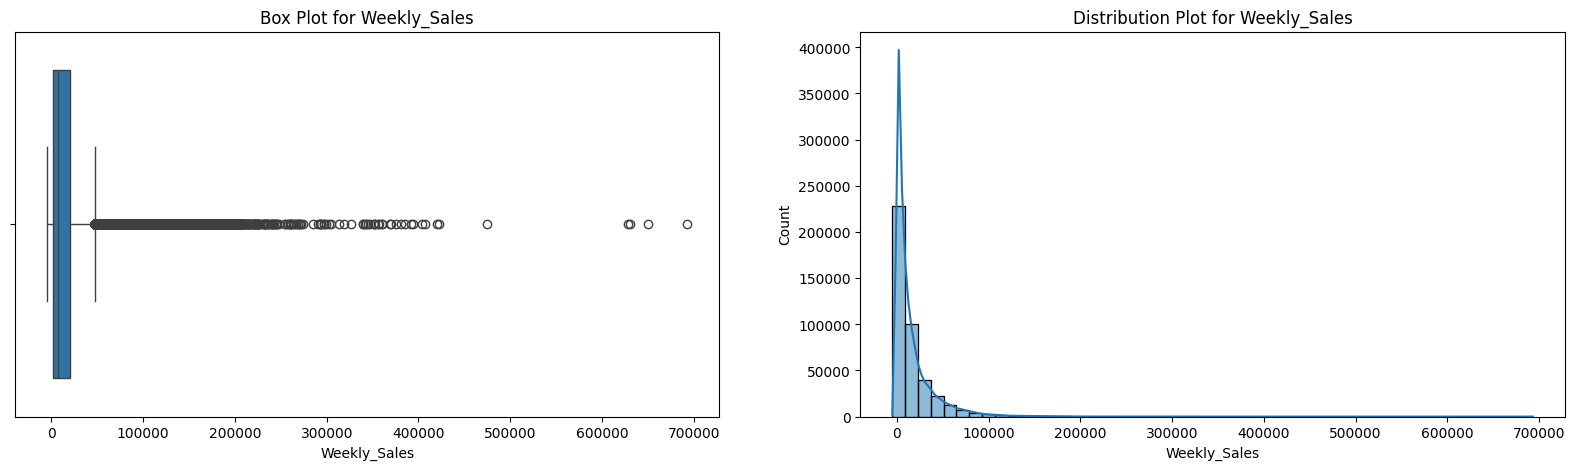

In [51]:

continuous_columns = ['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5',
                      'Weekly_Sales']
for i in continuous_columns:
    plot(df, i)
     

In [52]:
df.dtypes

Store                    int64
Type                    object
Size                     int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
month_year           period[M]
Year                     int32
dtype: object

In [53]:

df['Type'] = df['Type'].replace({'A':1,'B':2,"C":3})

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_15984\49579166.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [54]:

df.dtypes

Store                    int64
Type                     int64
Size                     int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
month_year           period[M]
Year                     int32
dtype: object

In [55]:
df['Year'] = df['Date'].dt.year

In [56]:
df = df.drop("Date",axis=1)

In [57]:
df.dtypes

Store               int64
Type                int64
Size                int64
Dept                int64
Weekly_Sales      float64
Temperature       float64
Fuel_Price        float64
MarkDown1         float64
MarkDown2         float64
MarkDown3         float64
MarkDown4         float64
MarkDown5         float64
CPI               float64
Unemployment      float64
IsHoliday            bool
month_year      period[M]
Year                int32
dtype: object

In [58]:
df = df.drop("month_year",axis=1)

In [59]:
df.dtypes

Store             int64
Type              int64
Size              int64
Dept              int64
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Year              int32
dtype: object

In [60]:
df.to_csv("salesforecastfinal.csv")

# Model Building

In [52]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year'],
      dtype='object')

In [61]:
# separating independent and dependent
x=df.drop(["Weekly_Sales","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"],axis=1)
y=df["Weekly_Sales"]

# Splitting training and testing dataset

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

class Regressor_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("decisiontree Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def RandomForestRegressor(self):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("RandomForestRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingRegressor
    model = GradientBoostingRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("GradientBoostingRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostRegressor
    model = AdaBoostRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("AdaBoostRegressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics

  def ExtraTreesRegressor(self):
    from sklearn.ensemble import ExtraTreesRegressor
    model = ExtraTreesRegressor().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    accuracy_metrics = {'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    print("Extra Trees Regressor accuracy score: ",r2_train,r2_test)
    return accuracy_metrics


In [65]:
model = Regressor_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestRegressor(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'ExtraTreesRegressor': model.ExtraTreesRegressor()
    }

decisiontree Regressor accuracy score:  1.0 0.9007396310054002
RandomForestRegressor accuracy score:  0.9915419157527184 0.9360248289268541
GradientBoostingRegressor accuracy score:  0.7437477590725805 0.7355616438232562
AdaBoostRegressor accuracy score:  0.07998608706628207 0.09451167423944096


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import numpy as np

# Optionally sample a smaller subset of the data for quicker testing
sample_frac = 0.1  # Use 10% of the data for parameter tuning
x_train_sample = x_train.sample(frac=sample_frac, random_state=42)
y_train_sample = y_train.sample(frac=sample_frac, random_state=42)

# Define a narrower parameter distribution for quicker search
param_dist = {
    'n_estimators': randint(50, 100),  # Reduced upper range
    'max_depth': randint(5, 15),       # Reduced range
    'min_samples_split': randint(2, 5), # Reduced range
    'min_samples_leaf': randint(1, 2),  # Reduced range
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the sample data
random_search.fit(x_train_sample, y_train_sample)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation R² score:", best_score)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

# Optional: Sample a subset of the data for quick testing
sample_frac = 0.1  # Use 10% of the data
x_train_sample = x_train.sample(frac=sample_frac, random_state=42)
y_train_sample = y_train.sample(frac=sample_frac, random_state=42)

# Define the parameters
params = {
    'n_estimators': 50,      # Reduced number of estimators
    'max_depth': 5,          # Reduced depth
    'learning_rate': 0.1,    # Typical learning rate
    'random_state': 42
}

# Initialize the model with parameters
gbr = GradientBoostingRegressor(**params)

# Fit the model on the training data
gbr.fit(x_train_sample, y_train_sample)

# Predict on the test data
y_pred = gbr.predict(x_test)

# Evaluate the model
test_score = r2_score(y_test, y_pred)
print("Test set R² score:", test_score)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Save the model
joblib.dump(gbr, 'resal_gradient_model.pkl')


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import numpy as np

# Optionally sample a smaller subset of the data for quicker testing
sample_frac = 0.1  # Use 10% of the data for parameter tuning
x_train_sample = x_train.sample(frac=sample_frac, random_state=42)
y_train_sample = y_train.sample(frac=sample_frac, random_state=42)

# Define a narrower parameter distribution for quicker search
param_dist = {
    'n_estimators': randint(50, 100),  # Reduced upper range
    'max_depth': randint(5, 15),       # Reduced range
    'min_samples_split': randint(2, 5), # Reduced range
    'min_samples_leaf': randint(1, 2),  # Reduced range
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the sample data
random_search.fit(x_train_sample, y_train_sample)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation R² score:", best_score)


Best parameters: {'bootstrap': True, 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 72}
Best cross-validation R² score: 0.8842632795886091


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

# Optional: Sample a subset of the data for quick testing
sample_frac = 0.1  # Use 10% of the data
x_train_sample = x_train.sample(frac=sample_frac, random_state=42)
y_train_sample = y_train.sample(frac=sample_frac, random_state=42)

# Define the parameters
params = {
    'n_estimators': 50,  # Reduced number of trees
    'max_depth': 5,      # Reduced depth
    'random_state': 42
}

# Initialize the model with parameters
rf = RandomForestRegressor(**params, n_jobs=-1)

# Fit the model on the training data
rf.fit(x_train_sample, y_train_sample)

# Predict on the test data
y_pred = rf.predict(x_test)

# Evaluate the model
test_score = r2_score(y_test, y_pred)
print("Test set R² score:", test_score)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Save the model
joblib.dump(rf, 'resale_regression_model.pkl')


Test set R² score: 0.6207702861336939
Mean Absolute Error: 8626.560311992229


['resale_regression_model.pkl']

# Task 2: Model the effects of markdowns on holiday weeks

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Sample data for quicker testing (optional, adjust fraction as needed)
sample_frac = 0.1  # Use 10% of the data for quicker training
df_sample = df.sample(frac=sample_frac, random_state=42)

# Feature engineering
df_sample['IsHoliday'] = df_sample['IsHoliday'].astype(int)  # Convert 'IsHoliday' to binary indicator

# Model building
X = df_sample[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']]
y = df_sample['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Interpretation and recommendations
# Analyze coefficients to understand the impact of markdowns on holiday weeks
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Absolute Error: 14958.176465883385
        Feature  Coefficient
0   Temperature    12.701022
1    Fuel_Price -1777.721050
2     MarkDown1     0.425317
3     MarkDown2  -208.441237
4     MarkDown3    55.363106
5     MarkDown4    -1.103271
6     MarkDown5     0.513151
7           CPI   -22.718570
8  Unemployment  -315.589844
9     IsHoliday  1639.275223
